# Runtime and cost analysis of Dynamic algorithm versus static algorithms for finding K-center

### Subproblem - Dynamic SSSP in decrmental setting

To ensure the effectiveness of our dynamic K-center algorithm, we begin by evaluating different dynamic single-source-shortest-path (SSSP) algorithms. This comparison allows us to determine the most suitable approach for integration into our oain algorithm.

#### DecrementalDynamicSSSP from paper:
    Deterministic decremental SSSP in almost linear time
#### ES tree from paper:
    An On-Line Edge Deletion Problem
#### Scaled ES tree from paper:
    Faster Approximation Schemes for Fractional Multicommodity Flow Problems via Dynamic Graph Algorithms

In [69]:
import os
import matplotlib.pyplot as plt
import pandas as pd

directory = 'results/short/DecrementalSSSP'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]
dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalSSSP/{file}", sep = " "))
    

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

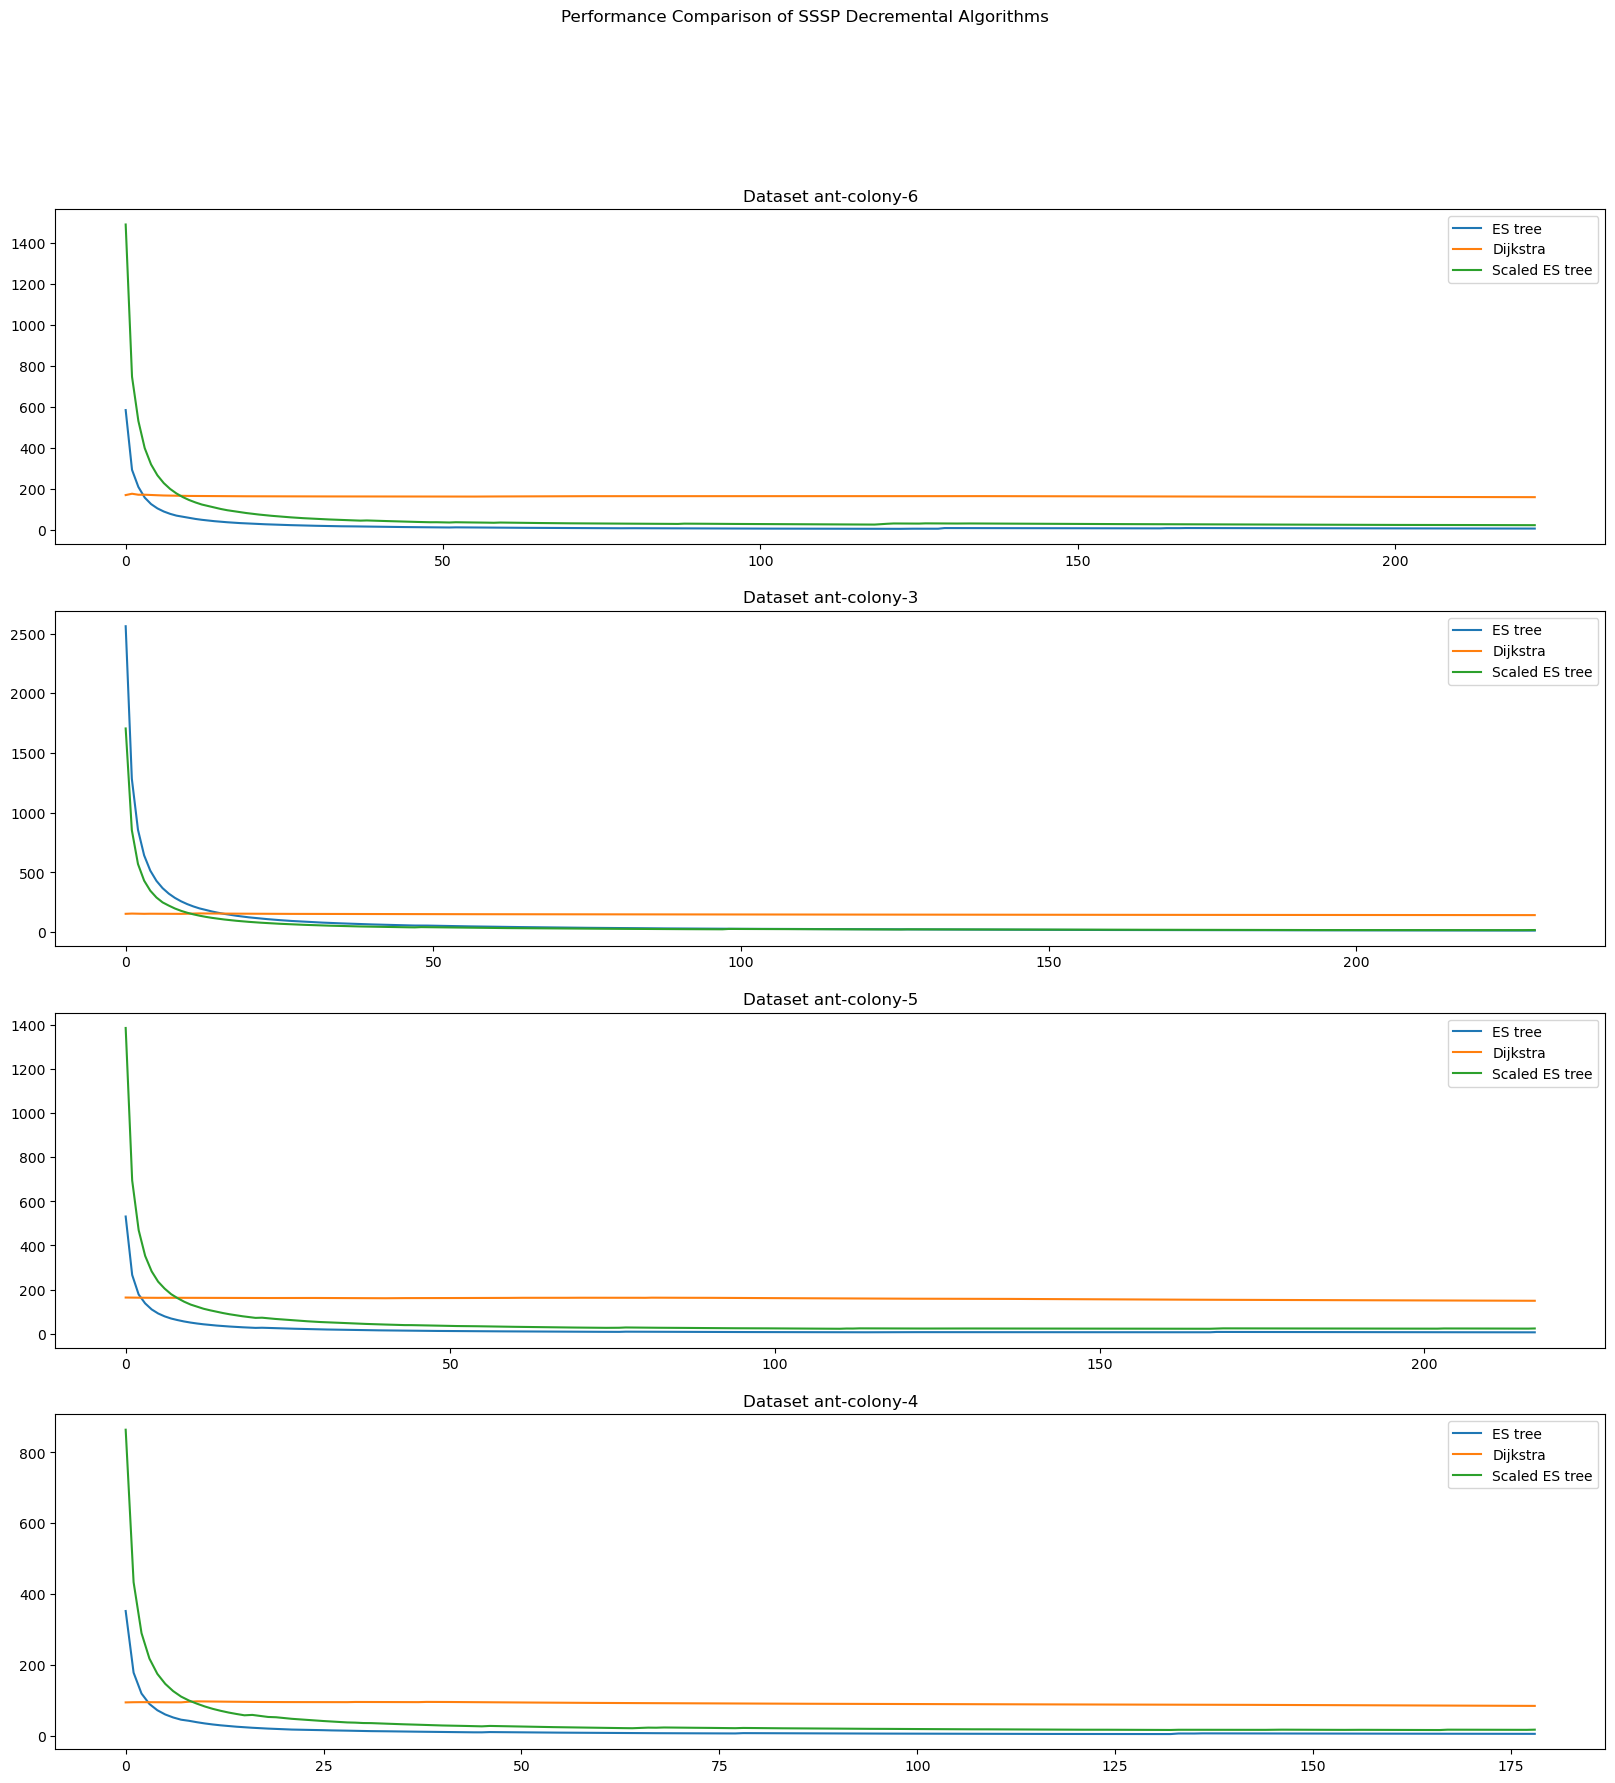

In [70]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(dfs), figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_EStree'], label="ES tree")
    axs[i].plot(df['mean_Dijkstra'], label="Dijkstra")
#     axs[i].plot(df['mean_DecrementalDynamicSSSP'], label="Decremental Dynamic SSSP")
    axs[i].plot(df['mean_ScaledEStree'], label="Scaled ES tree")
    axs[i].set_title(f'Dataset {files[i][:12]}')
    axs[i].legend()

fig.suptitle("Performance Comparison of SSSP Decremental Algorithms")
plt.show()

### Subproblem - Dynamic SSSP in Incremental setting

#### IncrementalDynamicSSSP from paper:
    Constructing Light Spanners Deterministically in Near-Linear Time
#### ES tree from paper:
    An On-Line Edge Deletion Problem
#### Dsource from paper:
    Constructing Light Spanners Deterministically in Near-Linear Time

In [71]:
directory = 'results/short/IncrementalSSSP'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalSSSP/{file}", sep = " "))
    
# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)
    

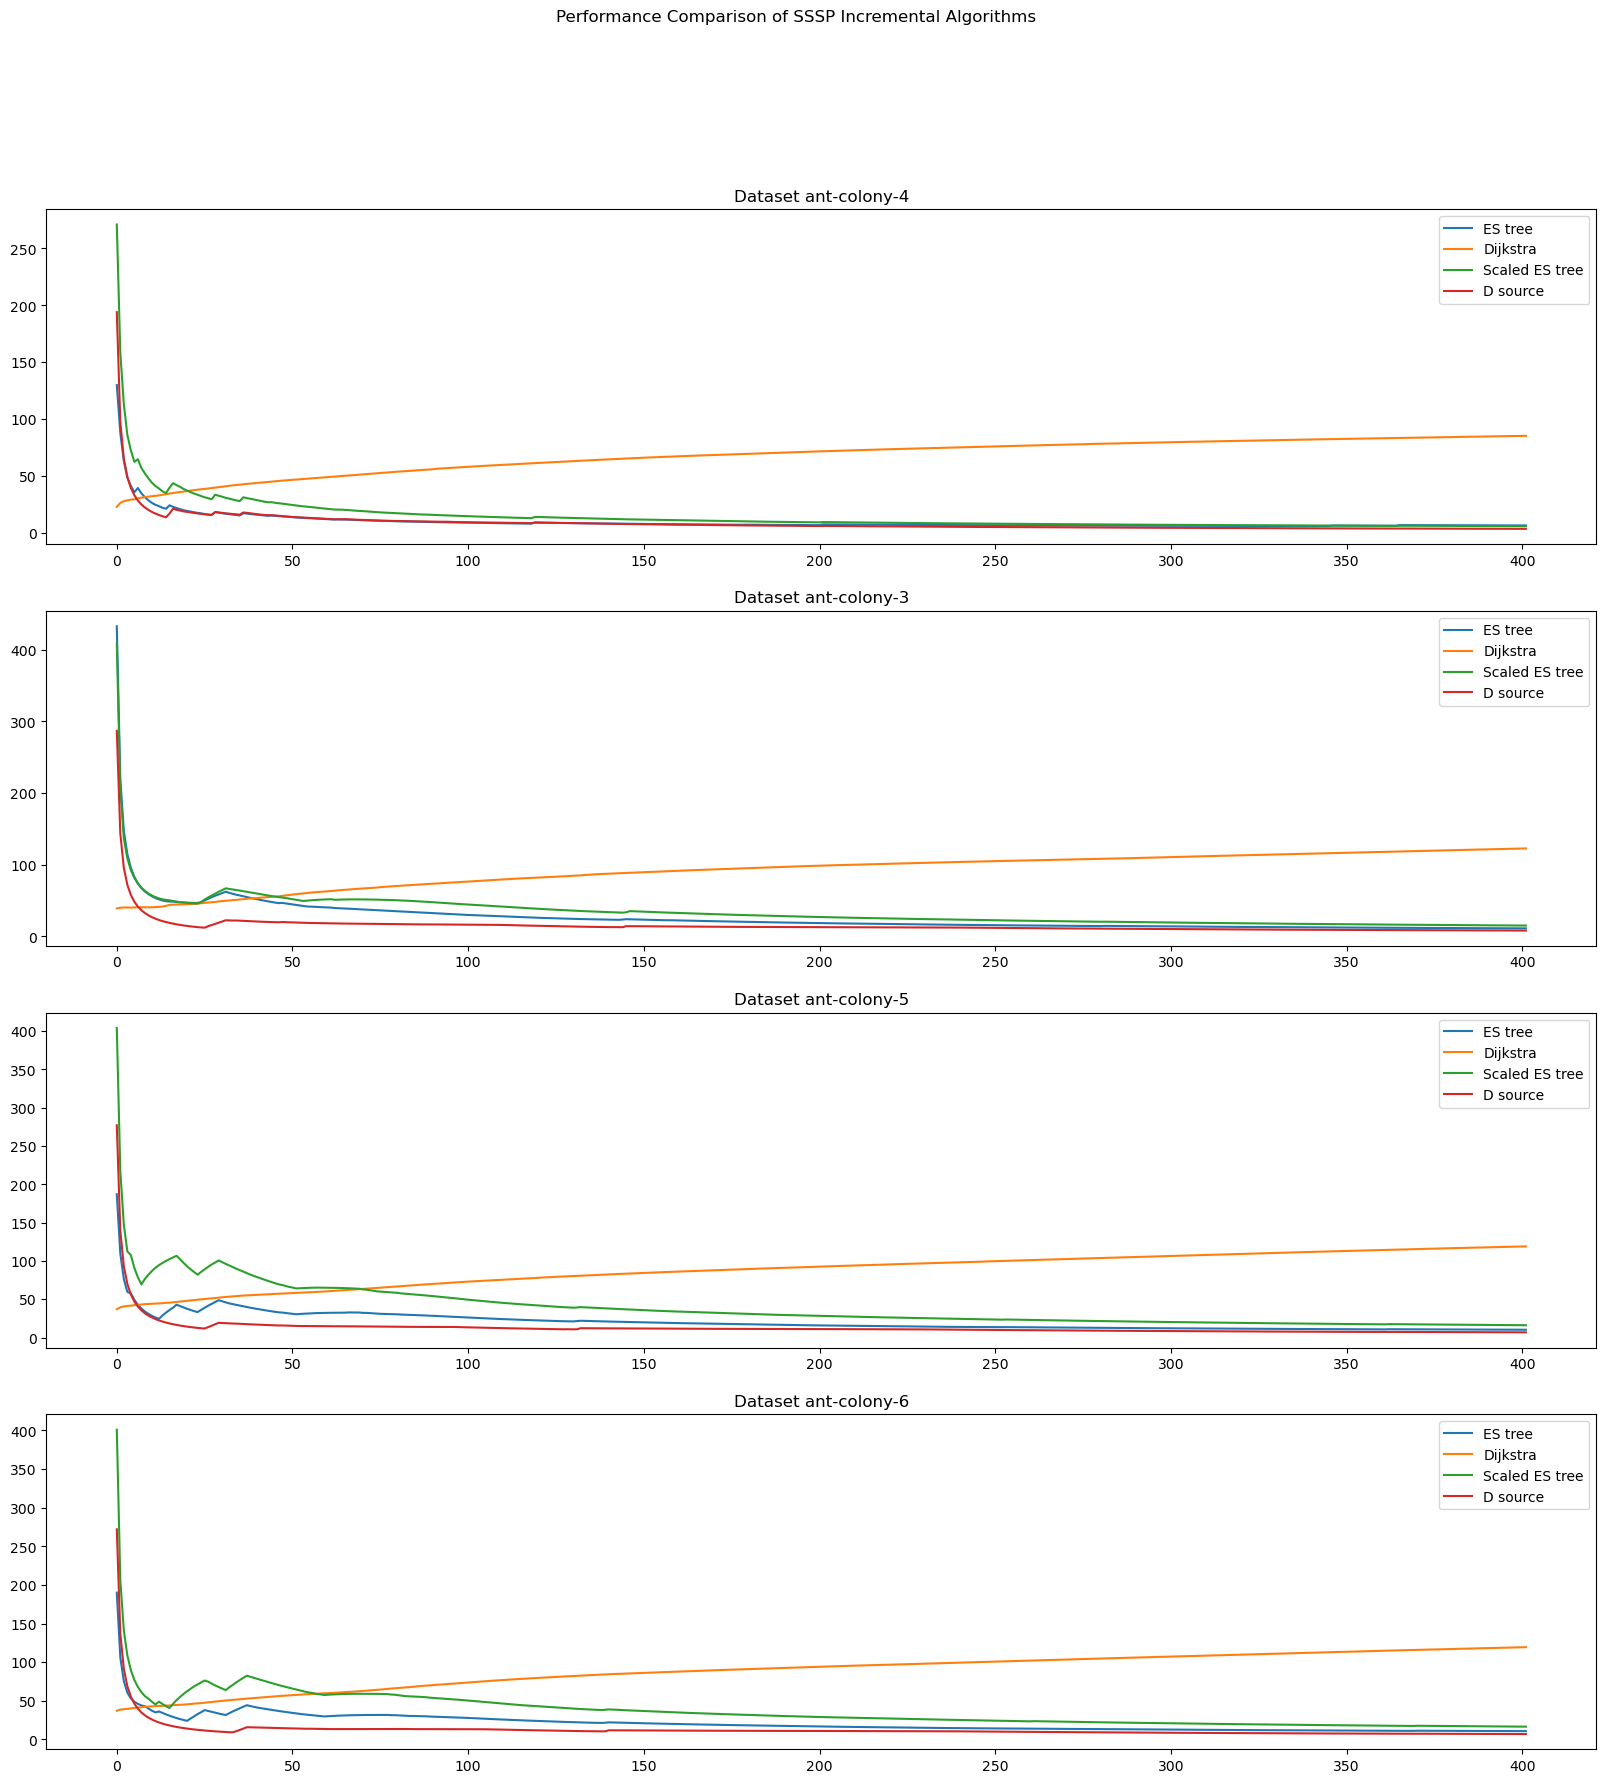

In [72]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_EStree'], label="ES tree")
    axs[i].plot(df['mean_Dijkstra'], label="Dijkstra")
#     axs[i].plot(df['mean_IncrementalDynamicSSSP'], label="Incremental Dynamic SSSP")
    axs[i].plot(df['mean_ScaledEStree'], label="Scaled ES tree")
    axs[i].plot(df['mean_Dsource'], label="D source")
    axs[i].set_title(f'Dataset {files[i][0:12]}')
    axs[i].legend()

fig.suptitle("Performance Comparison of SSSP Incremental Algorithms")
plt.show()

### Subproblem - Maximal Independent Set in Incremental setting

In [73]:
directory = 'results/short/IncrementalMIS/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalMIS/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

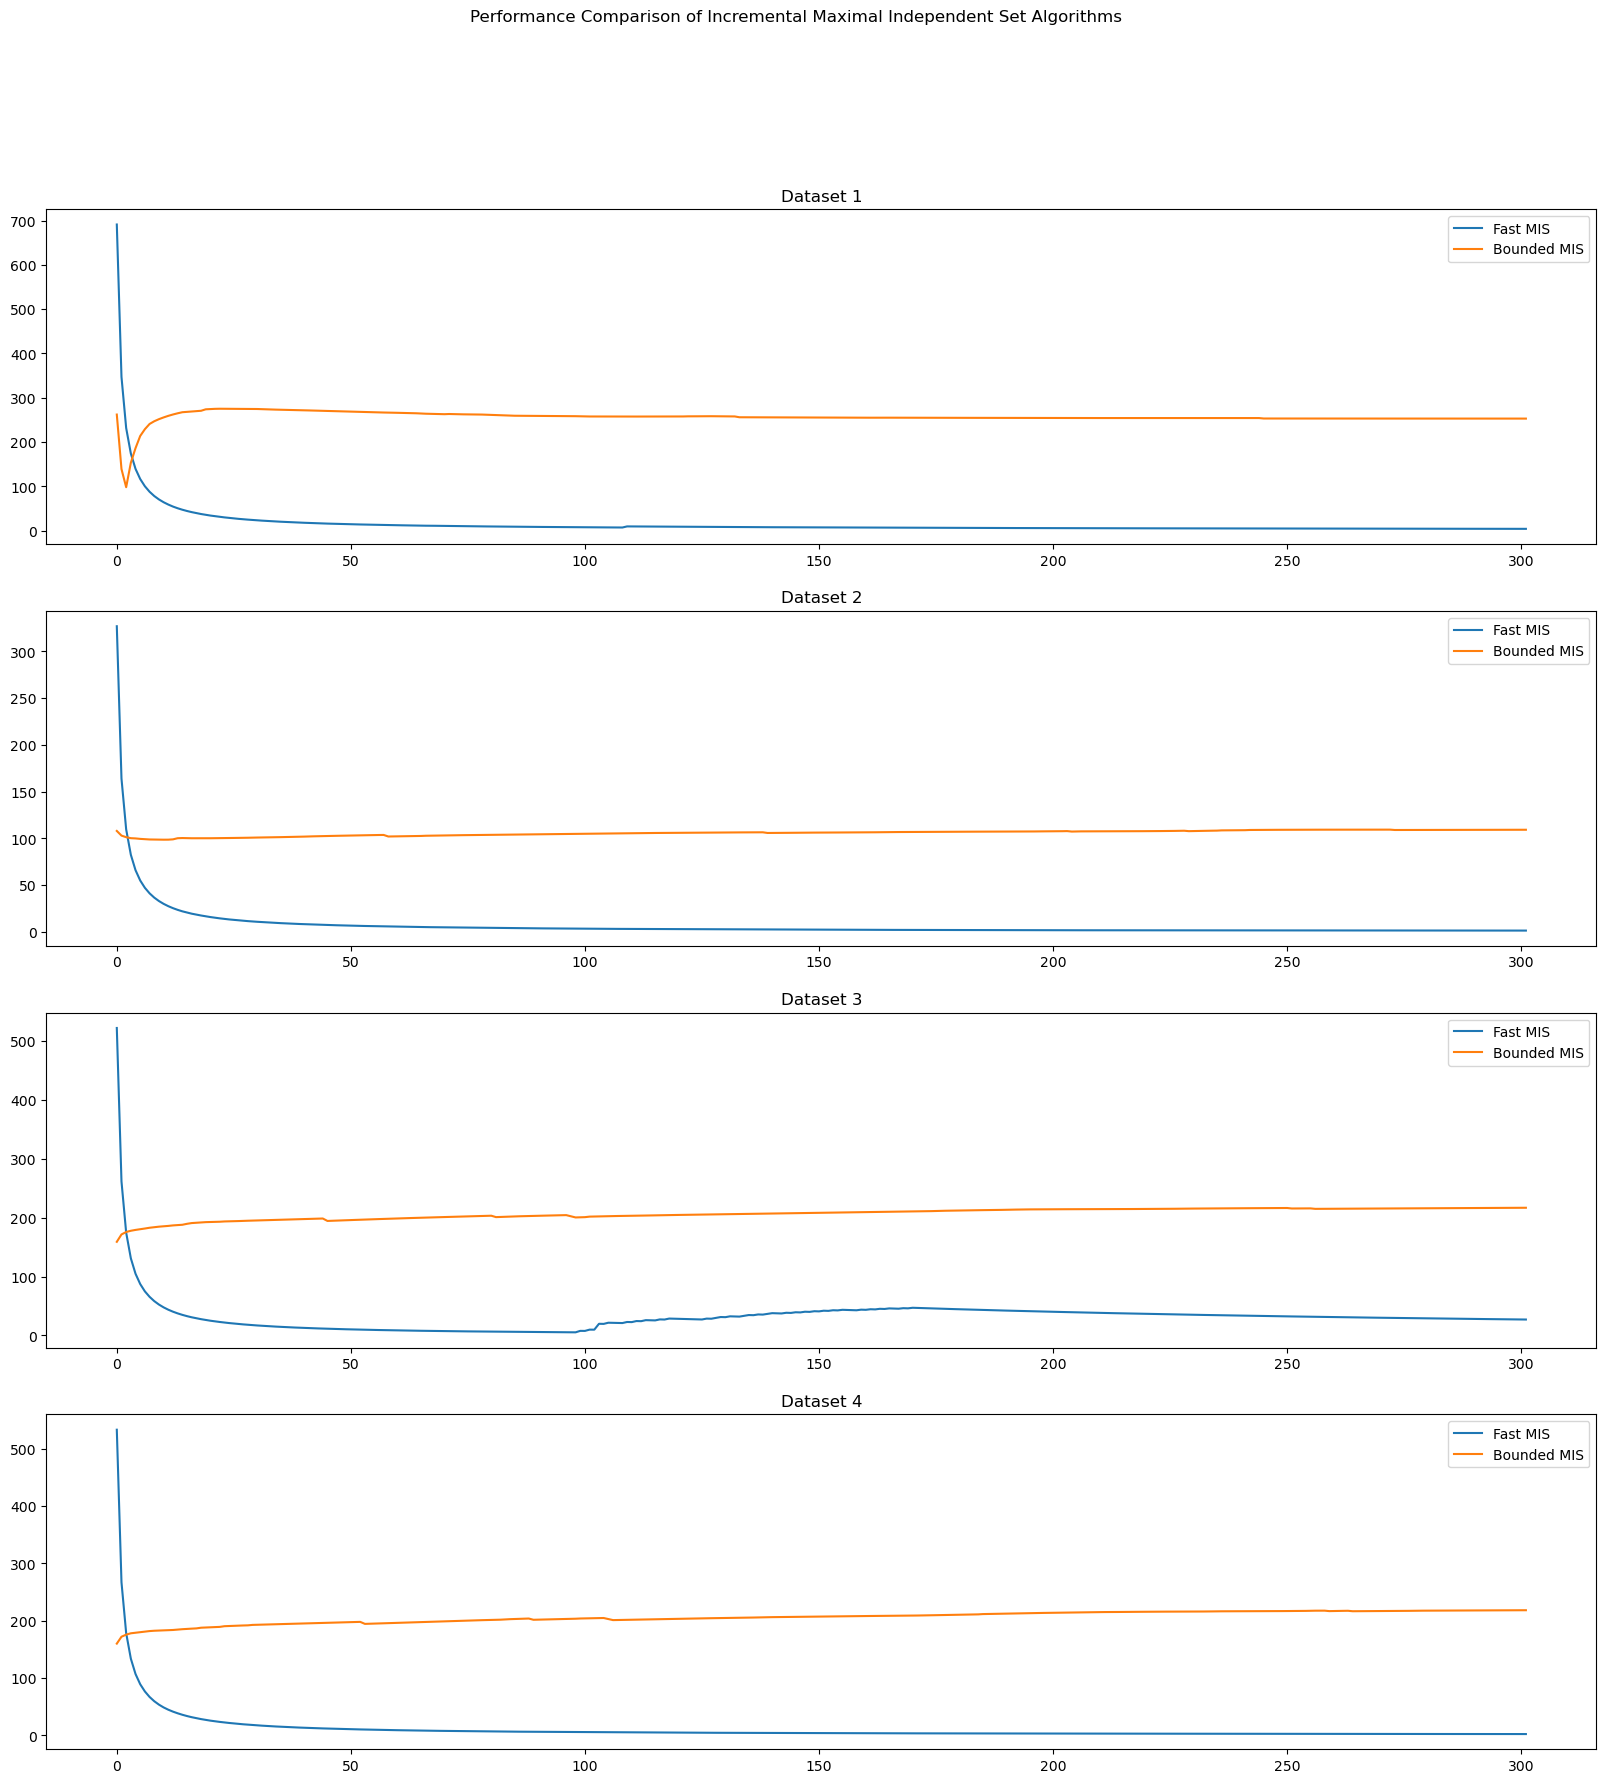

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_FastMIS'], label="Fast MIS")
    axs[i].plot(df['mean_KBoundedMIS'], label="Bounded MIS")
#     axs[i].plot(df['mean_GreedyMIS'], label="Greedy MIS")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of Incremental Maximal Independent Set Algorithms")
plt.show()

In [75]:
directory = 'results/short/IncrementalMIS/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalMIS/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

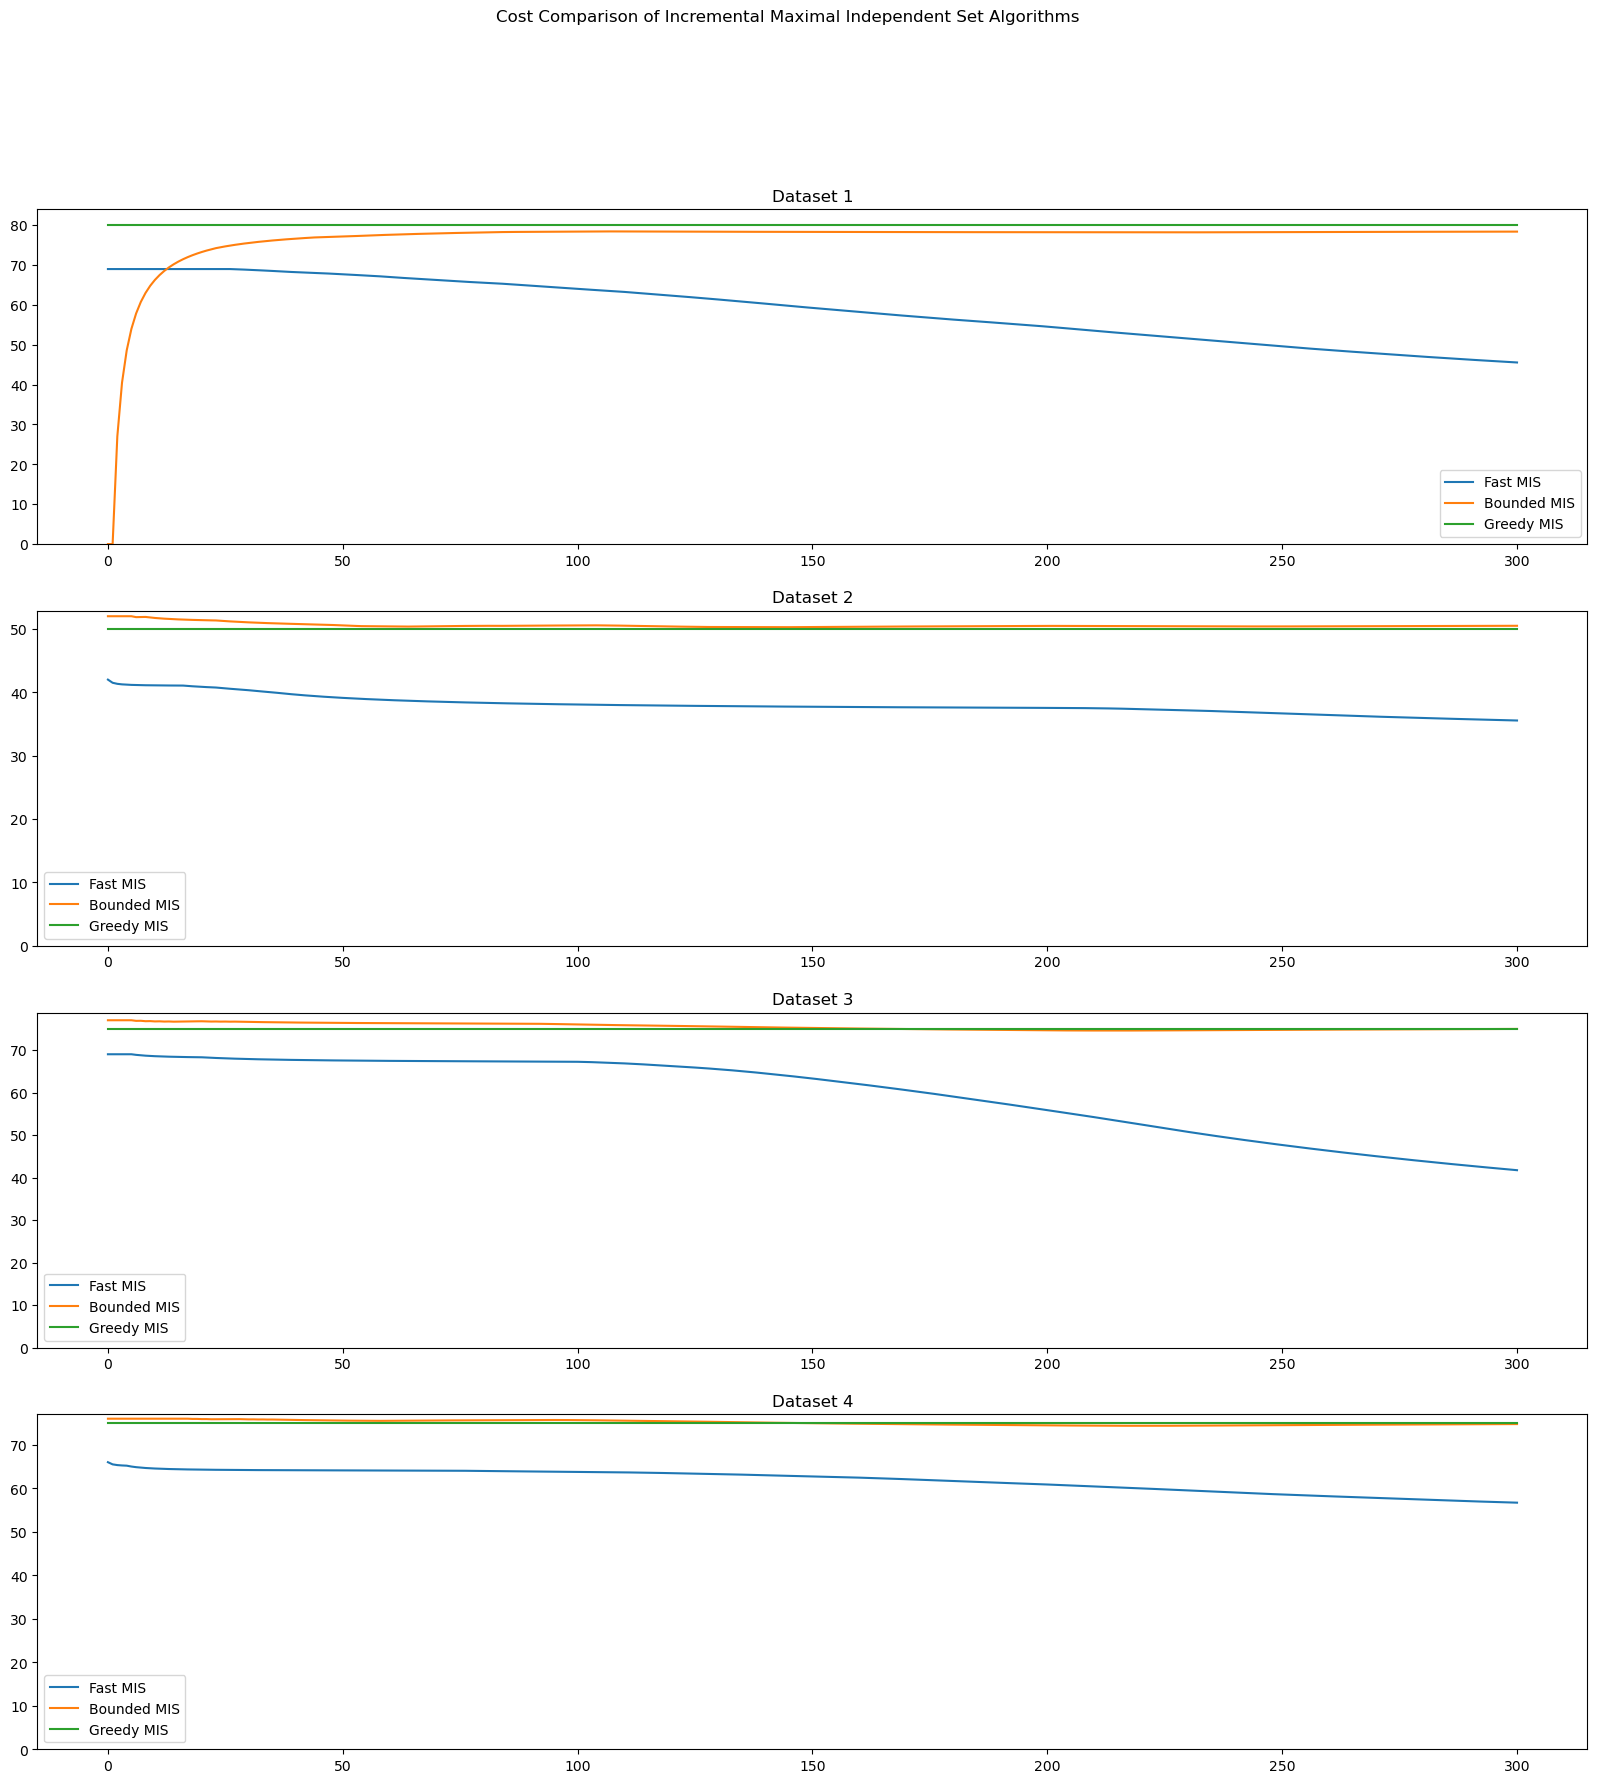

In [76]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_FastMIS'], label="Fast MIS")
    axs[i].plot(df['mean_KBoundedMIS'], label="Bounded MIS")
    axs[i].plot(df['mean_GreedyMIS'], label="Greedy MIS")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)

fig.suptitle("Cost Comparison of Incremental Maximal Independent Set Algorithms")
plt.show()

### Results of Decremental algorithm integrating ES tree

#### Dynamic algorithm from paper : 
    Fully Dynamic k-Center Clustering in Doubling Metrics
#### Static algorithms from papers: 
    Quick k-Median, k-Center, and Facility Location for Sparse Graphs
    On the Fine-Grained Complexity of Approximating k-Center in Sparse Graphs

In [78]:
directory = 'results/short/DecrementalKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

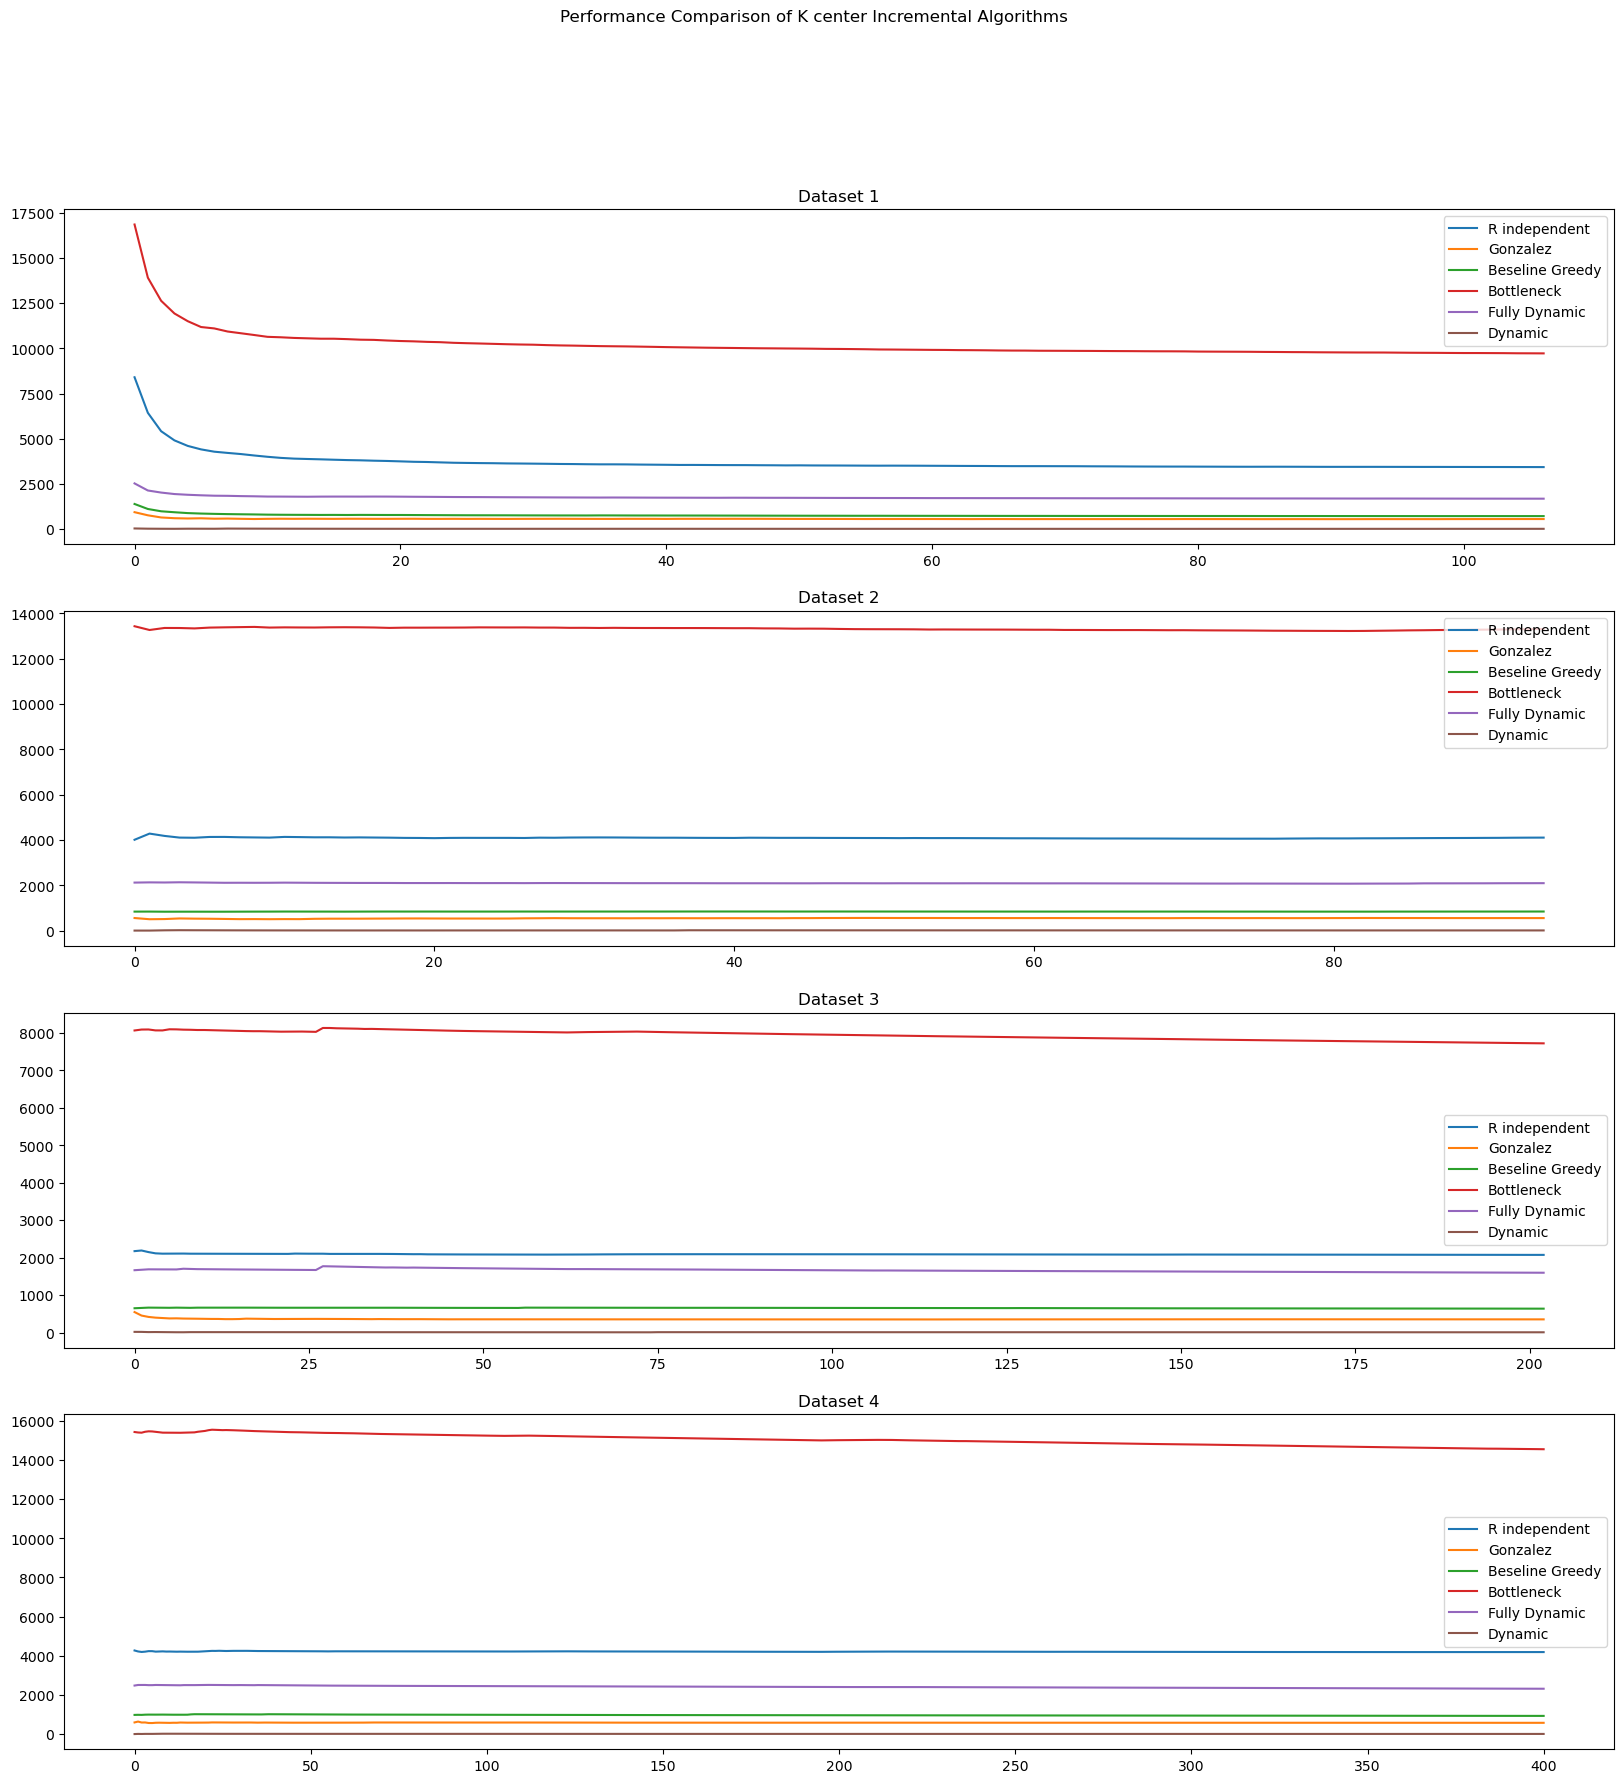

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [80]:
directory = 'results/short/DecrementalKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

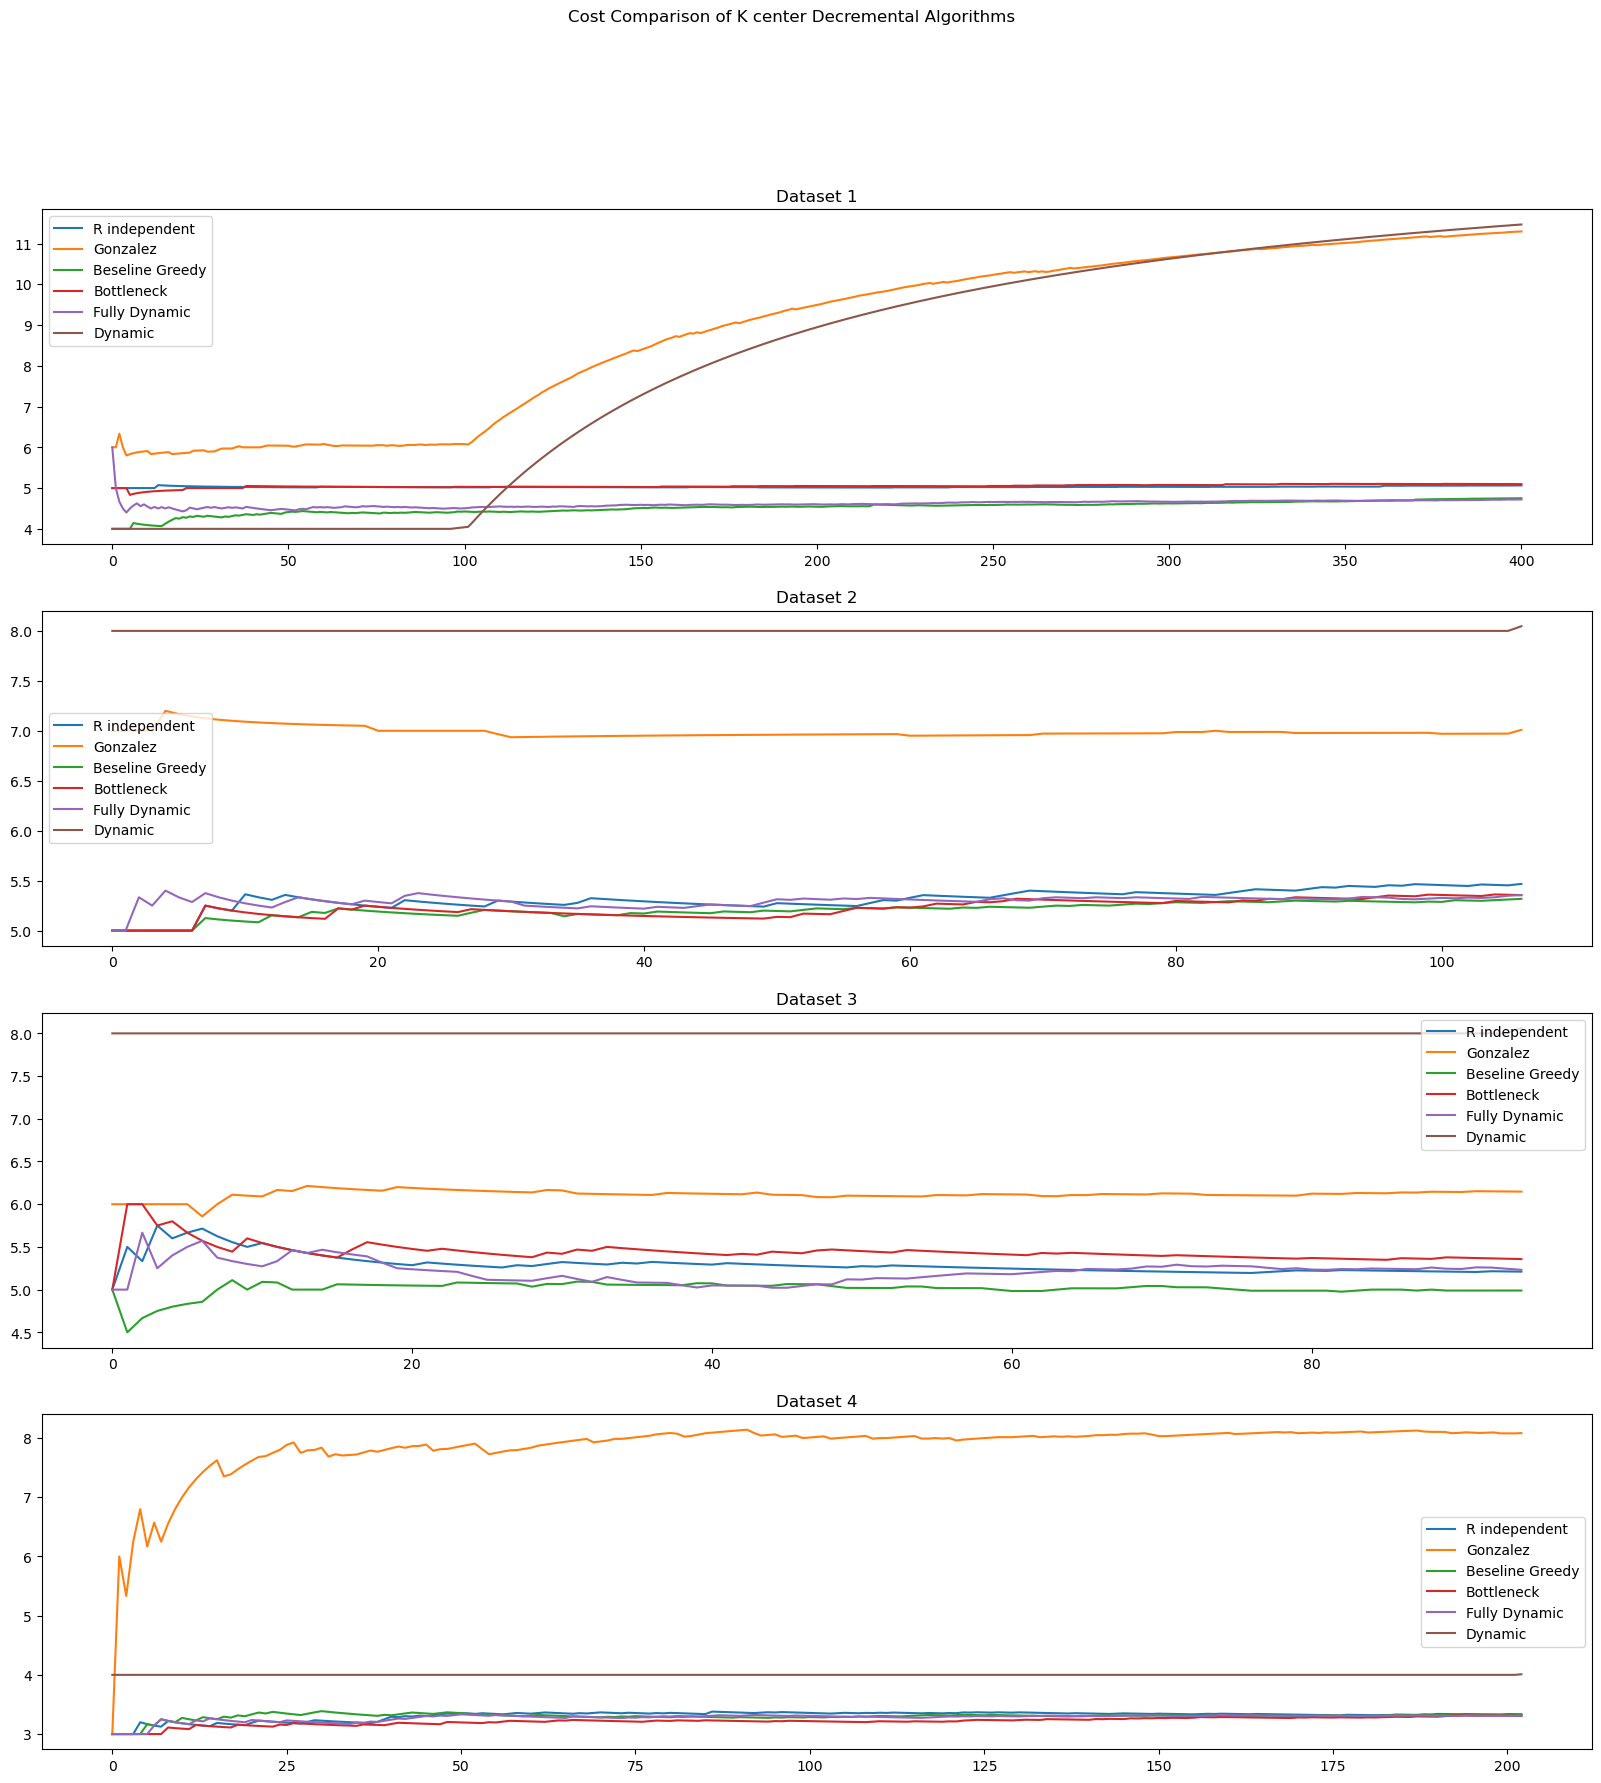

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Cost Comparison of K center Decremental Algorithms")
plt.show()

### Results of Incremental algorithm integrating Scaled ES tree

In [82]:
directory = 'results/short/IncrementalKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

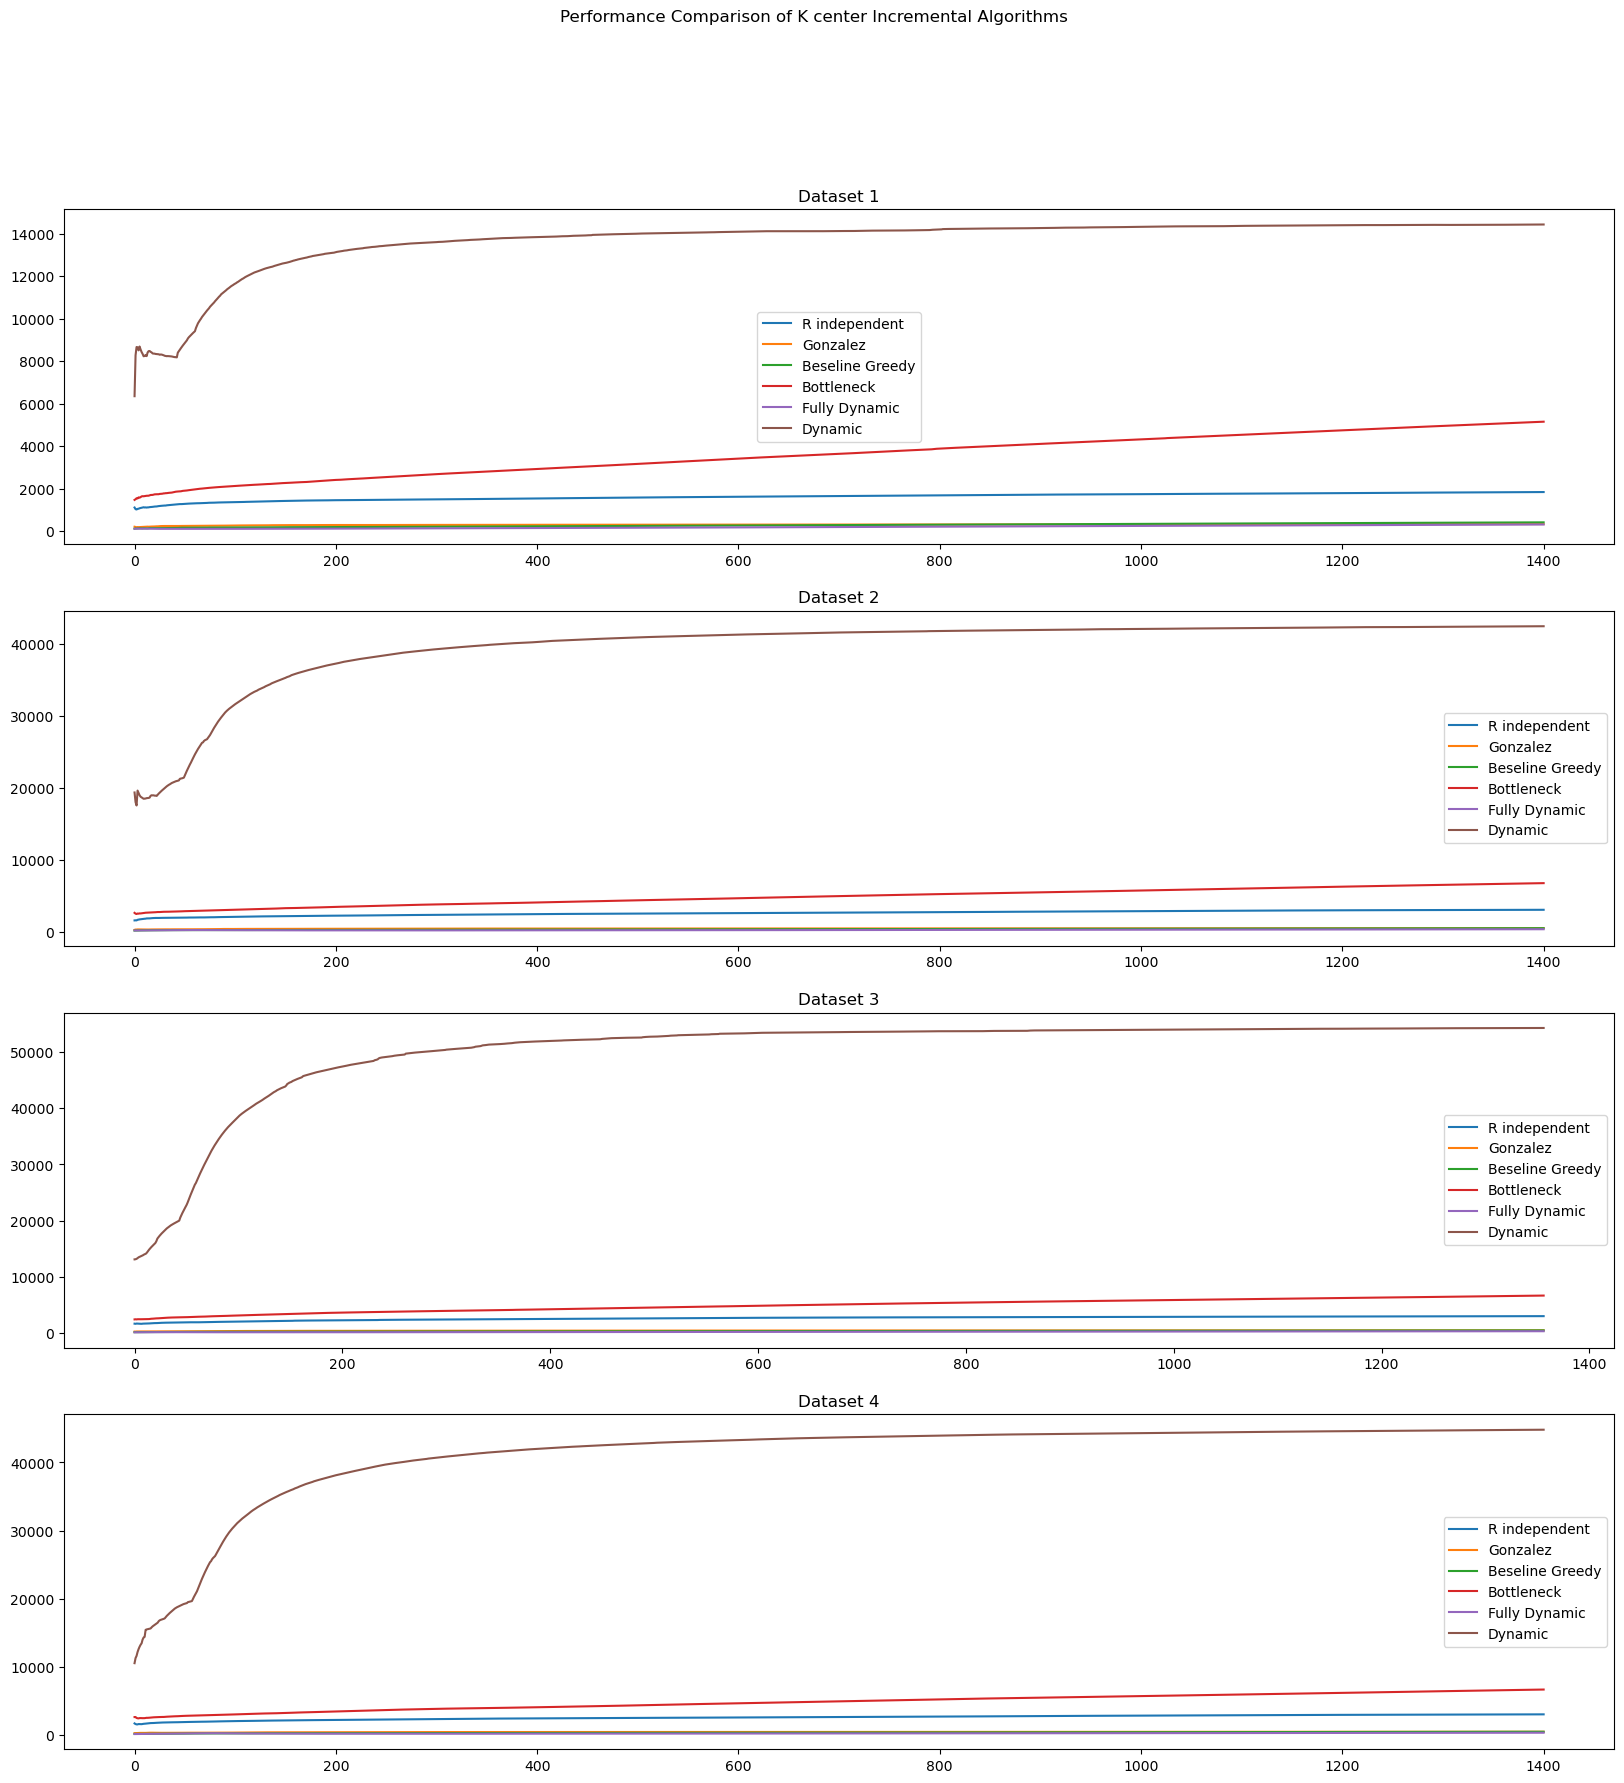

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
#     axs[i].plot(df['mean_ModifiedIncremental'], label="Modified Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [84]:
directory = 'results/short/IncrementalKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

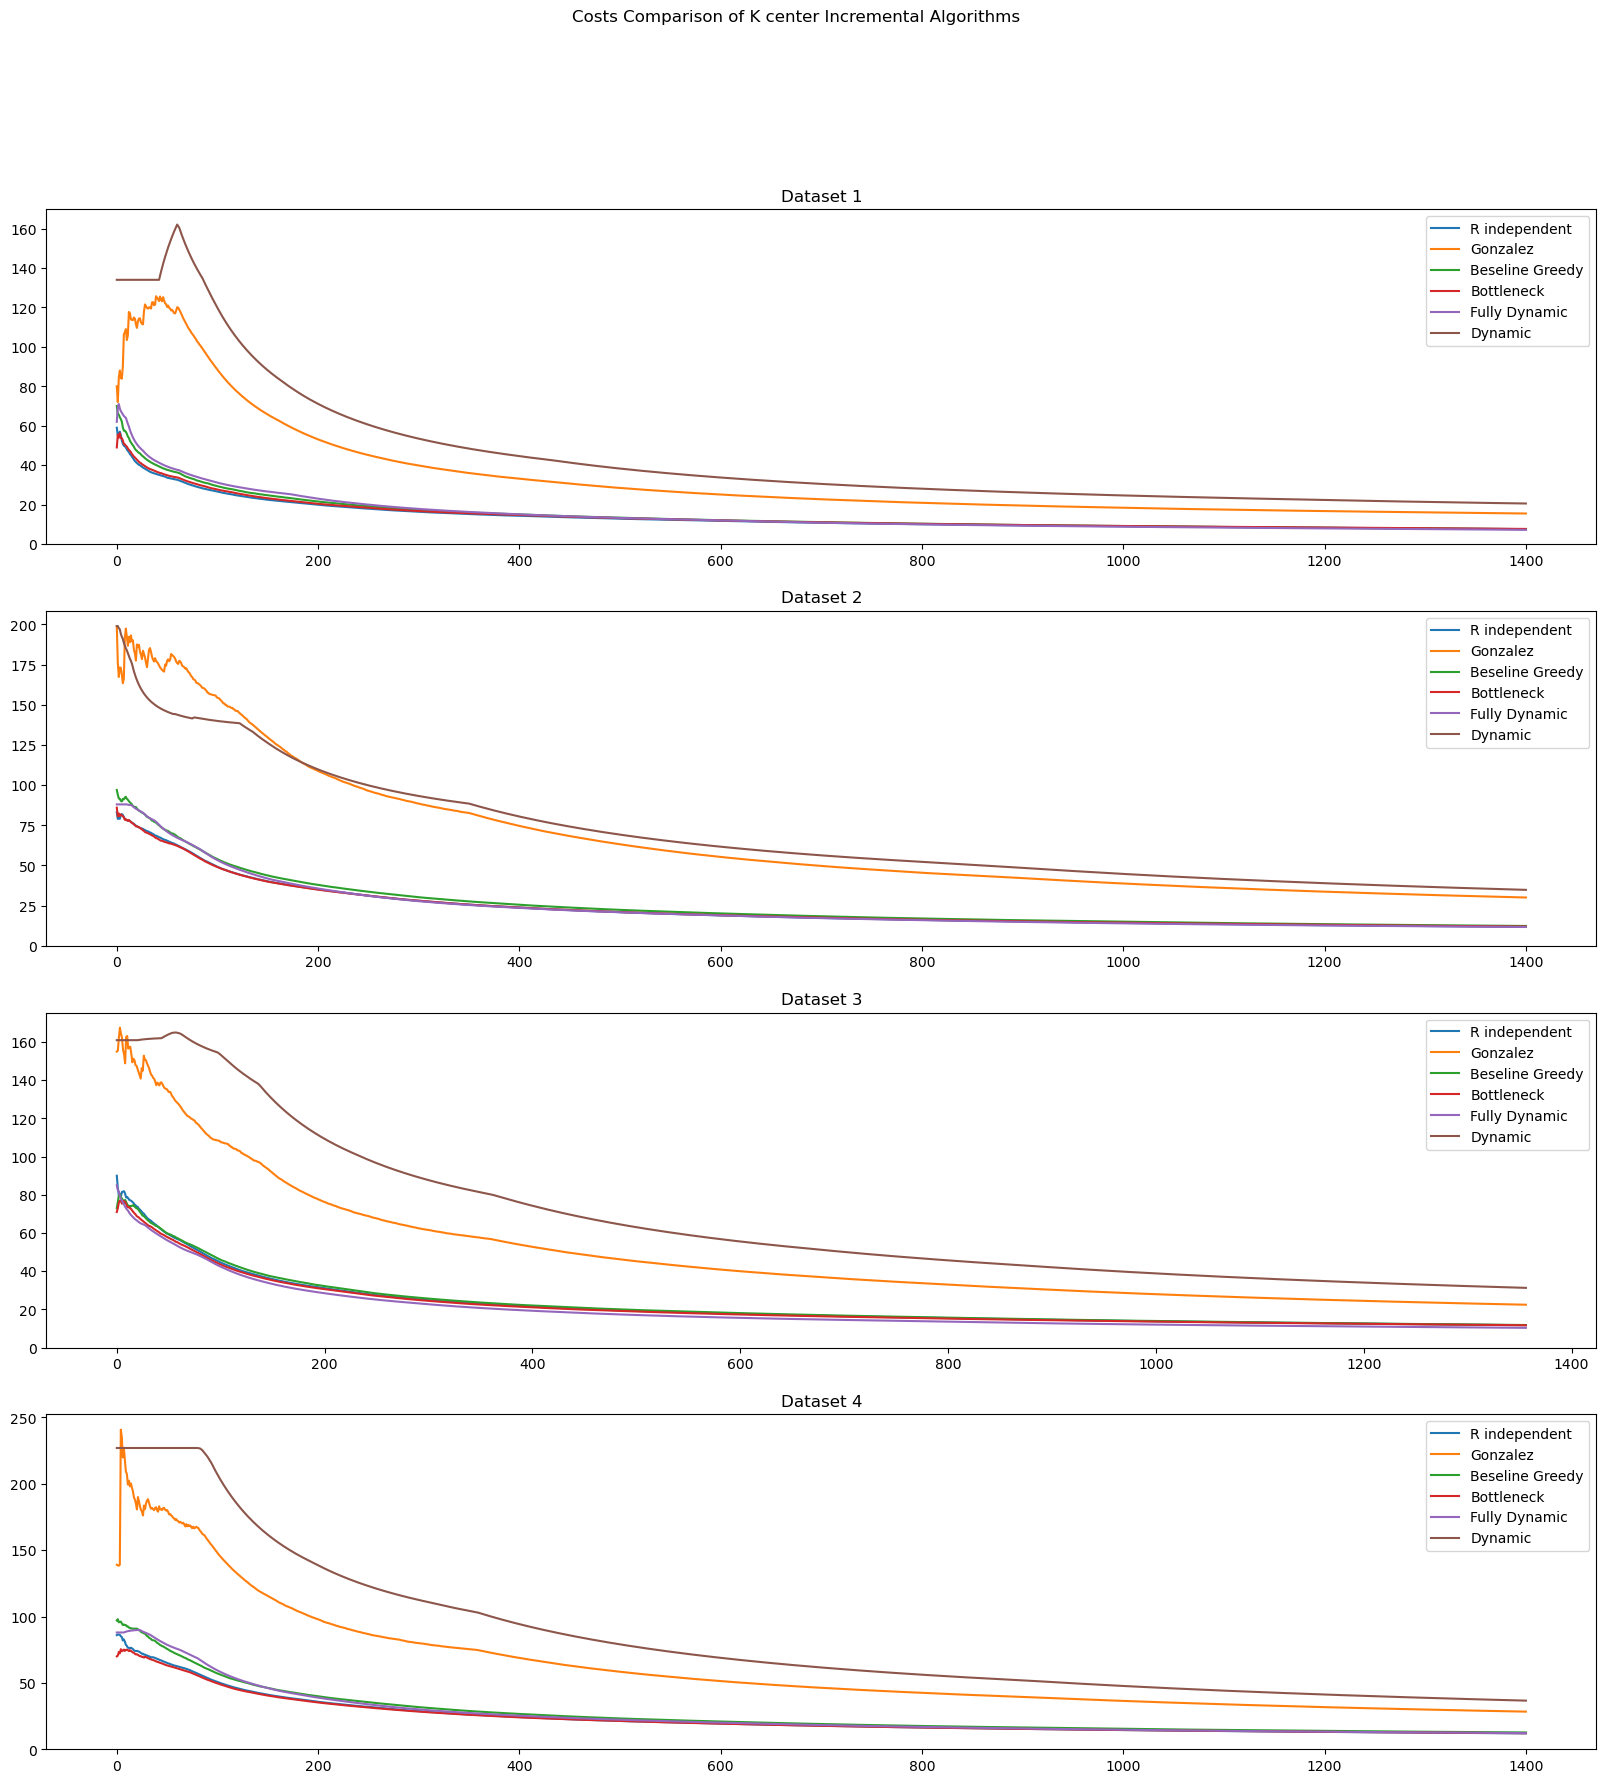

In [85]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
#     axs[i].plot(df['mean_ModifiedIncremental'], label="Modified Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)
    
fig.suptitle("Costs Comparison of K center Incremental Algorithms")
plt.show()

### Results of Fully Dynamic algorithm integrating Dijkstra

In [86]:
directory = 'results/short/FullKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/FullKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

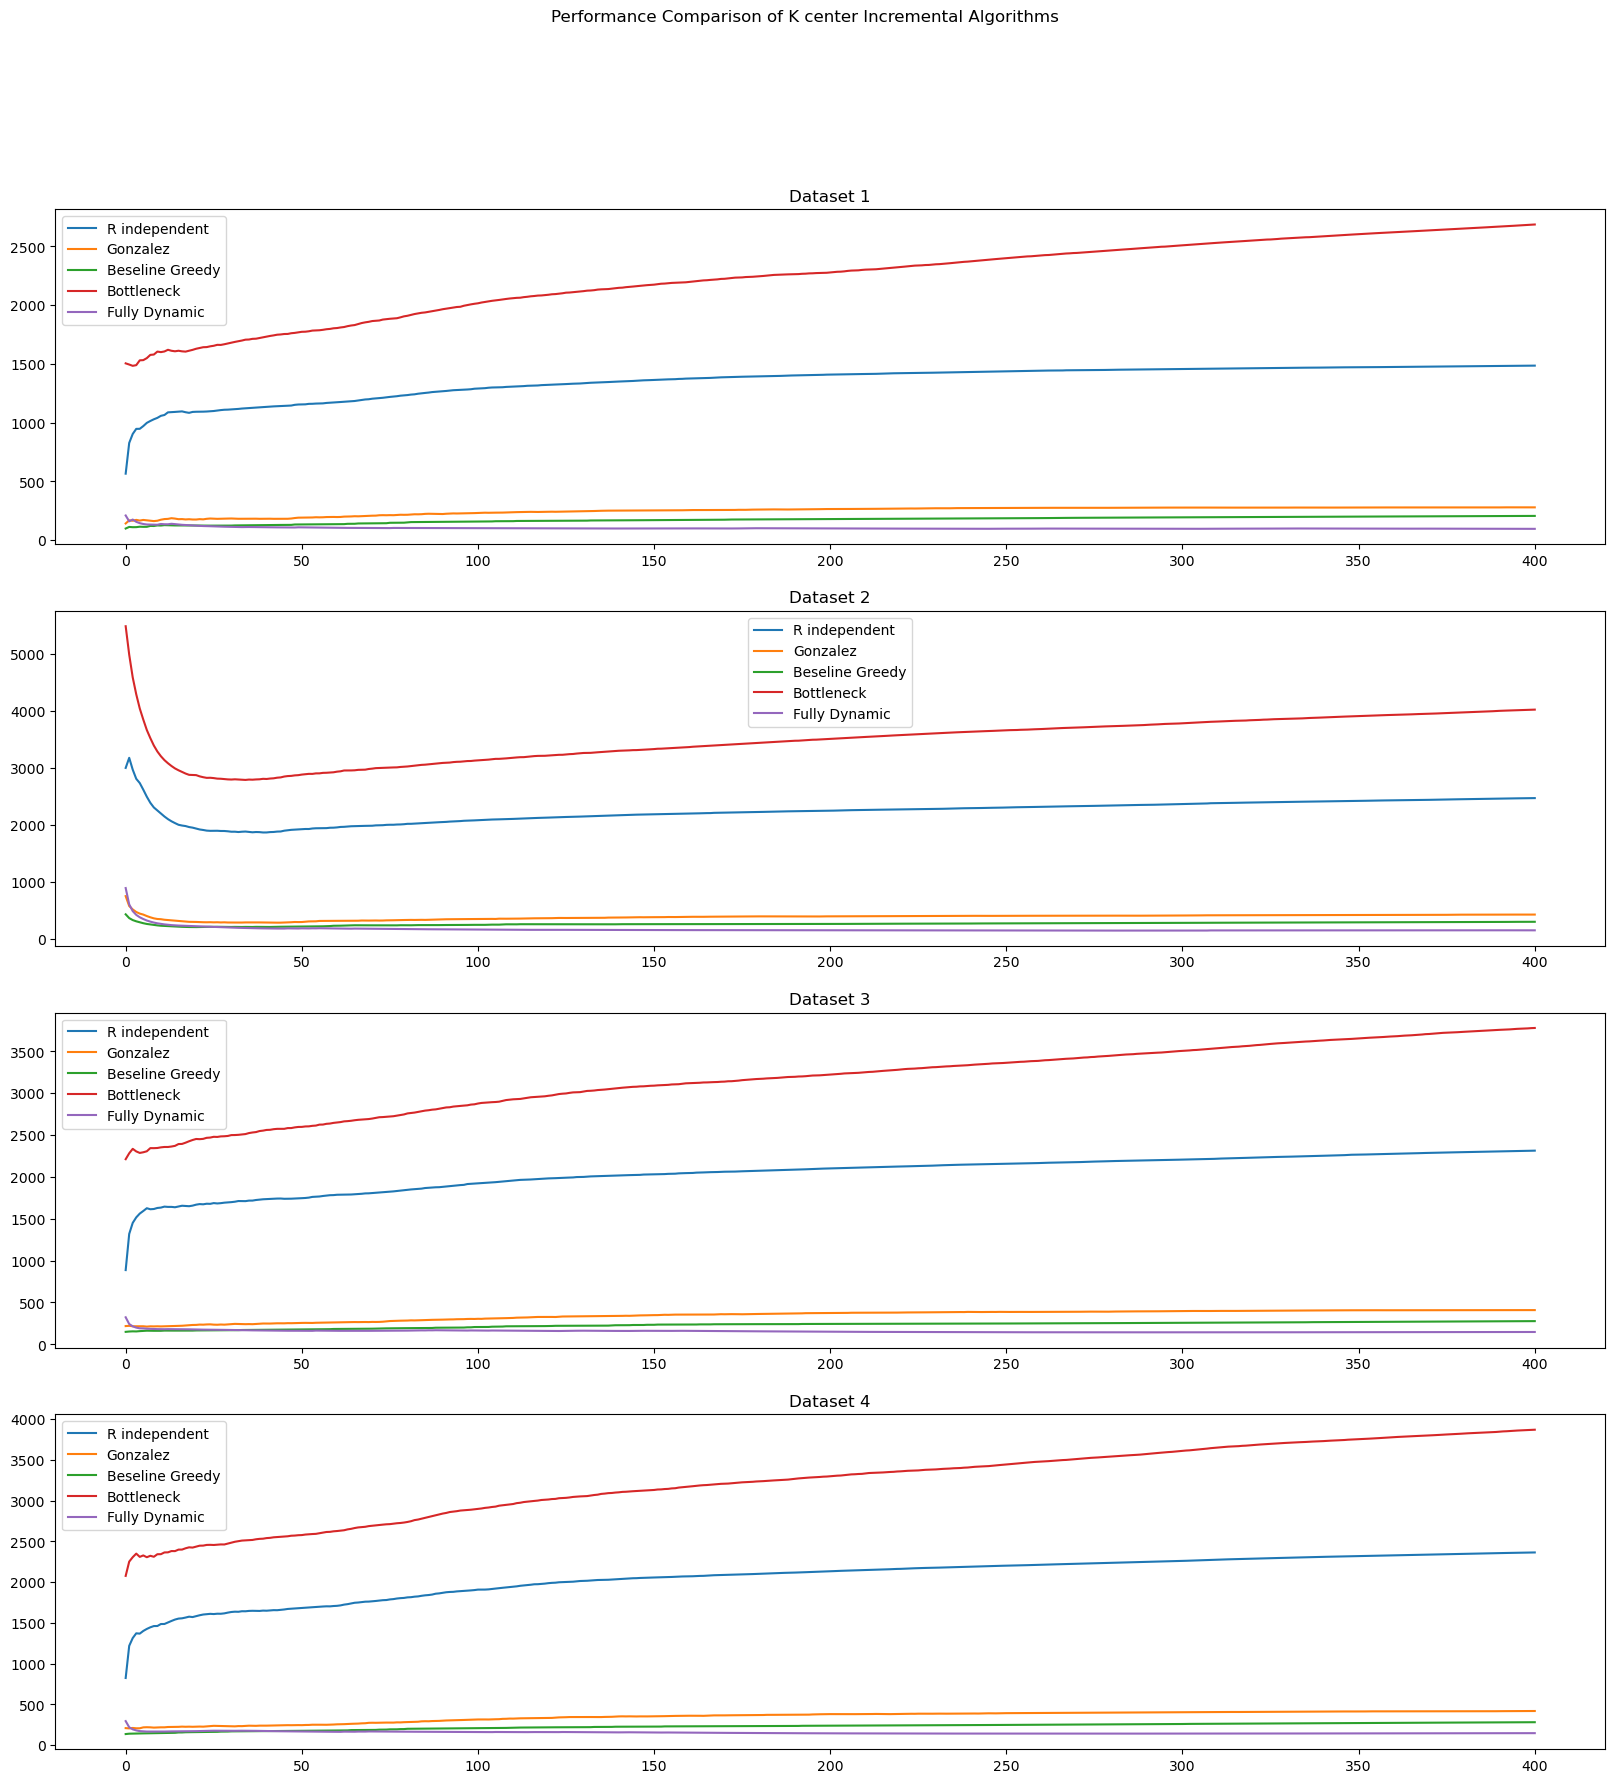

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [88]:
directory = 'results/short/FullKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/FullKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

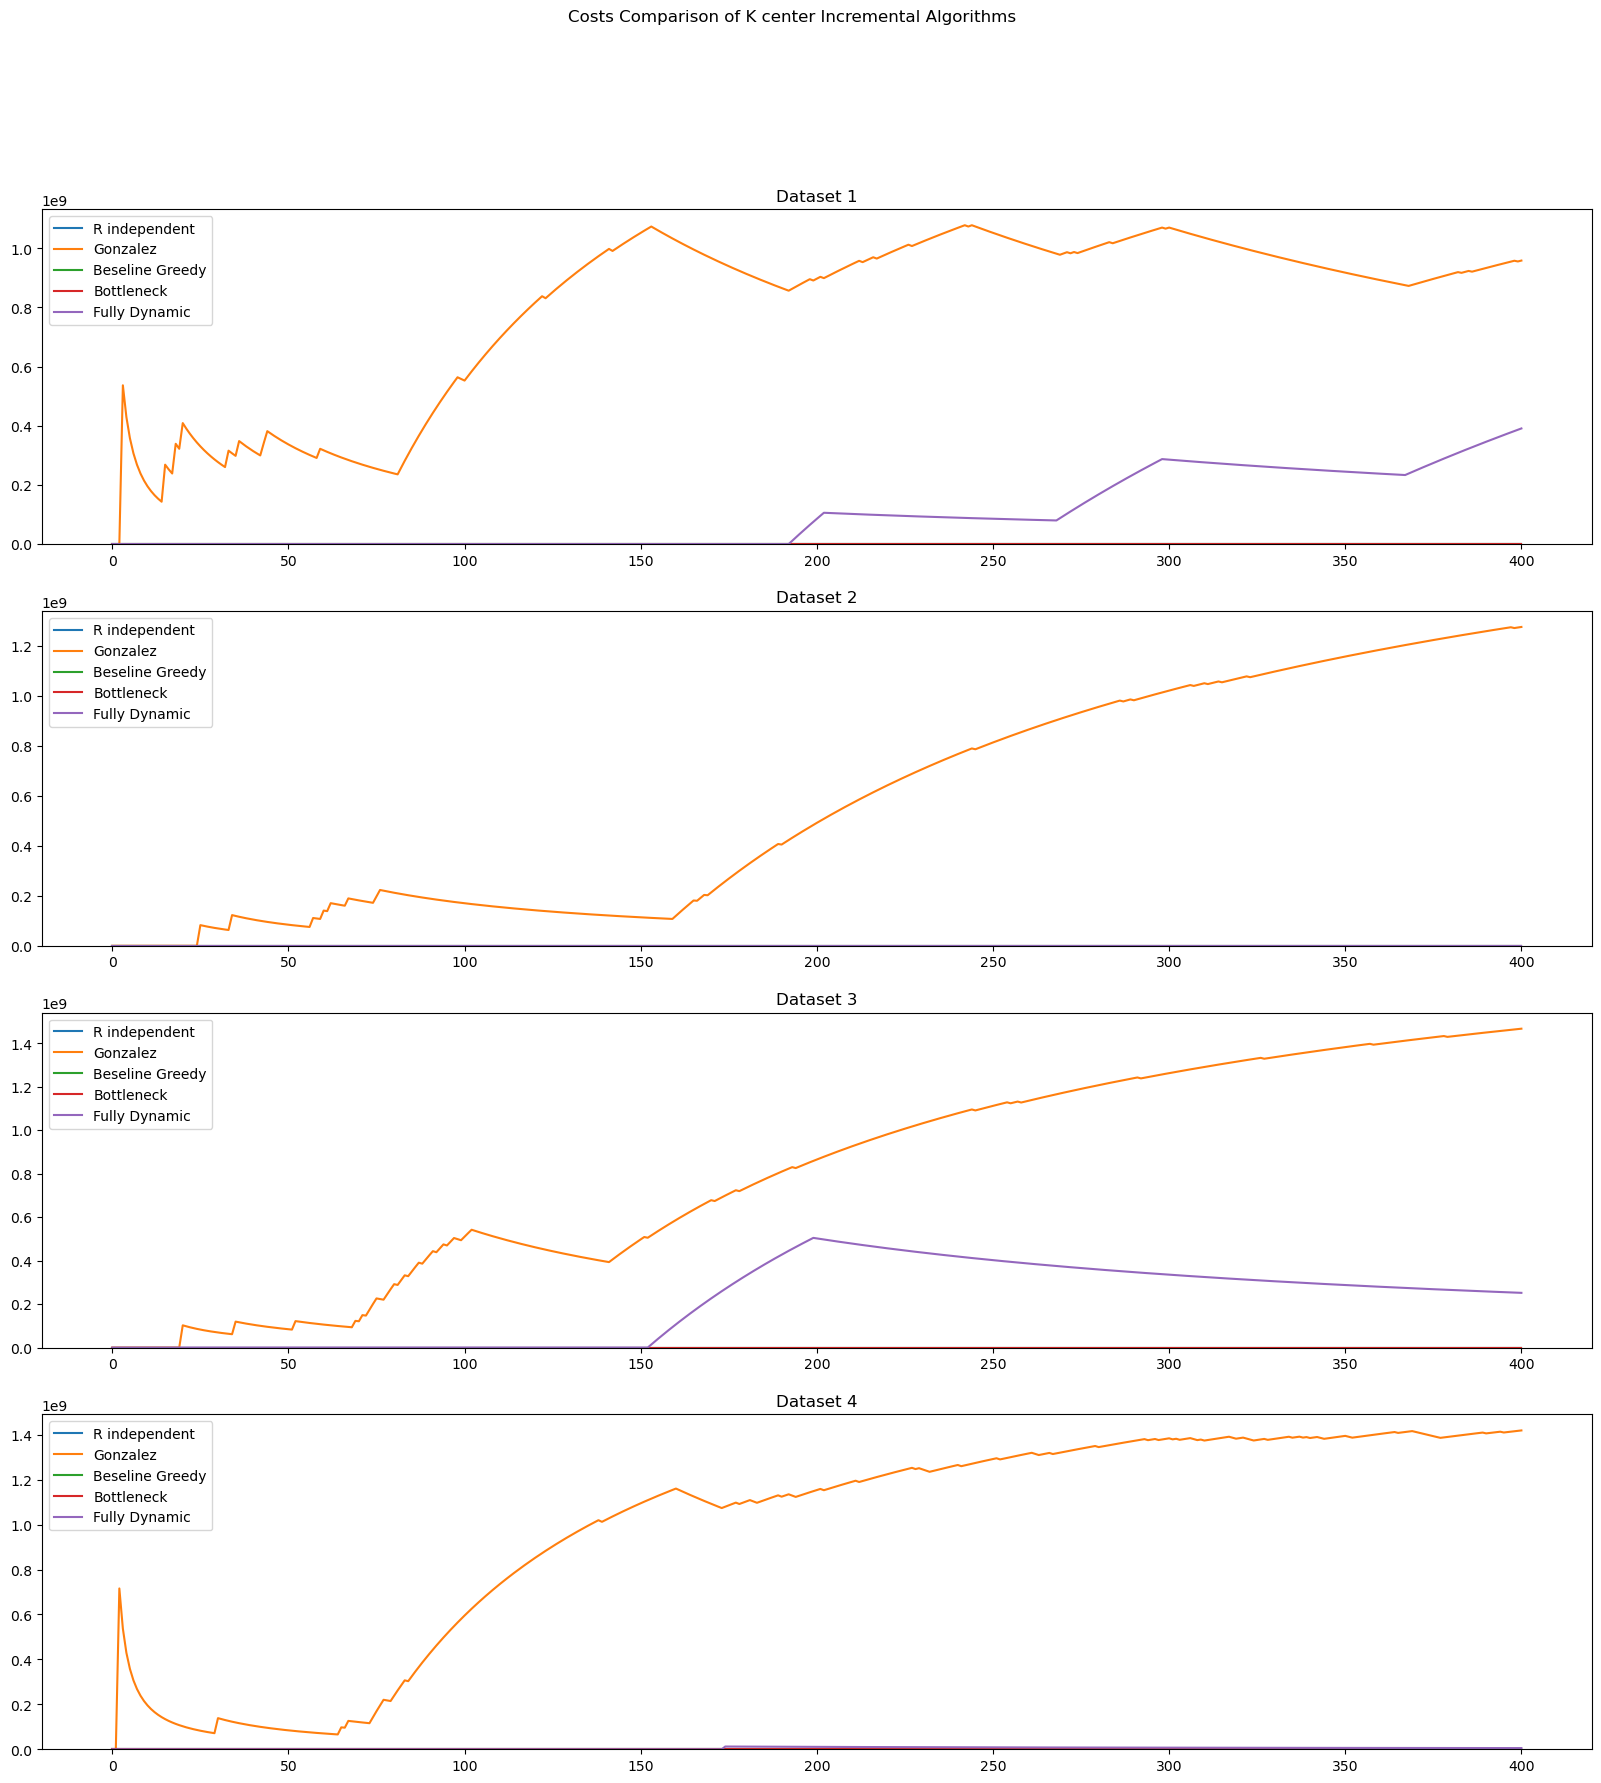

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)
    
fig.suptitle("Costs Comparison of K center Incremental Algorithms")
plt.show()

### Results depending on K

#### Decremental K center

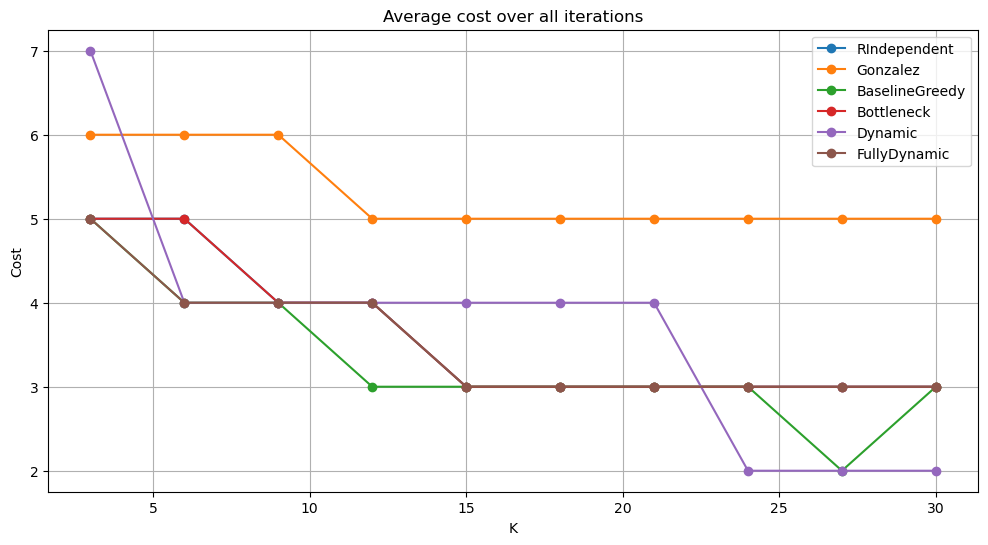

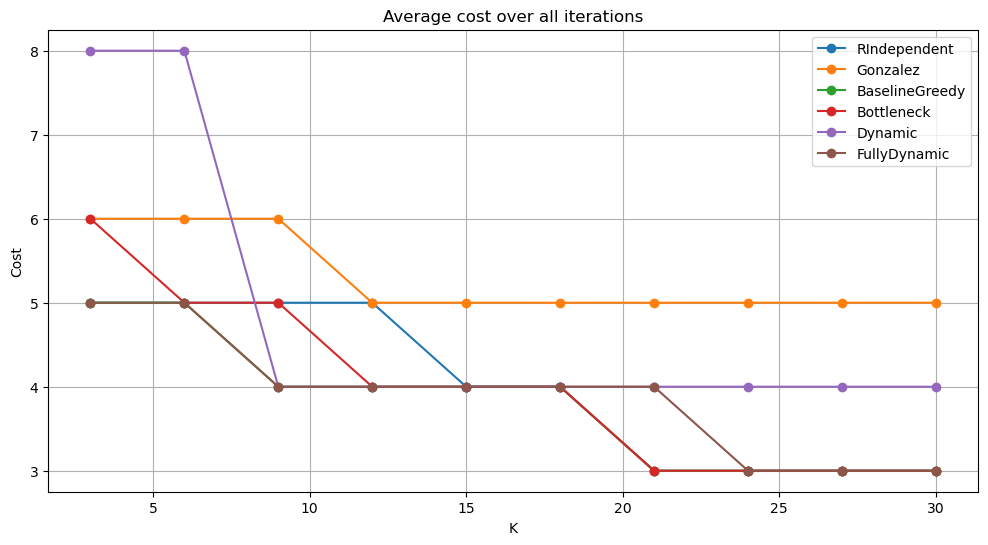

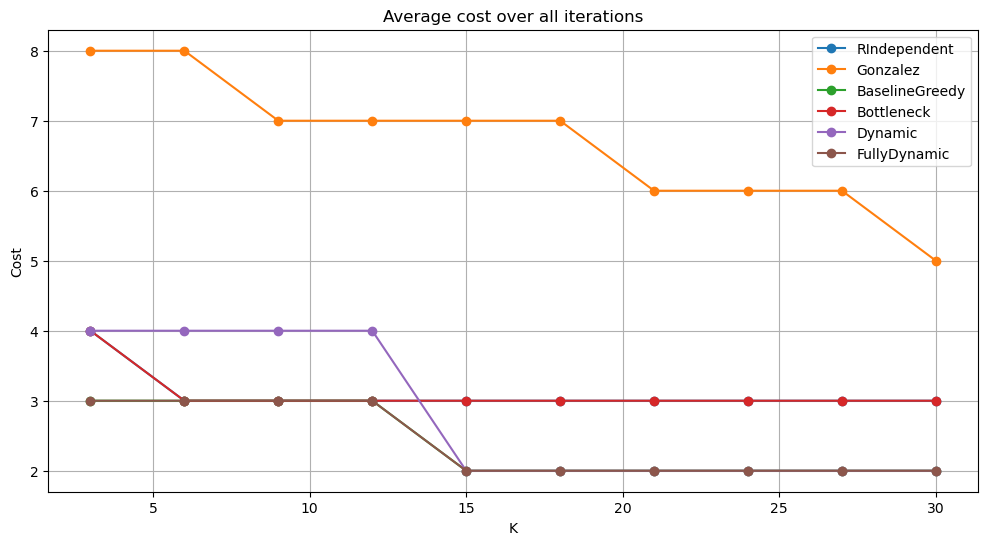

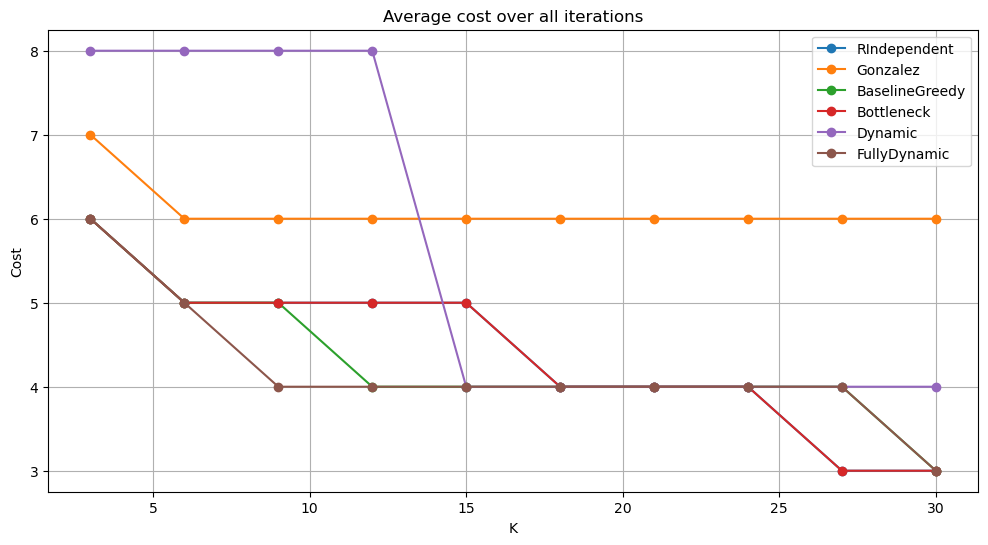

In [90]:
files = os.listdir('results/short/DecrementalKcenter')
files = [f for f in files if 'ant-colony' in f and 'Cost' in f]

for file in files:
    df = pd.read_csv('results/short/DecrementalKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.title('Average cost over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

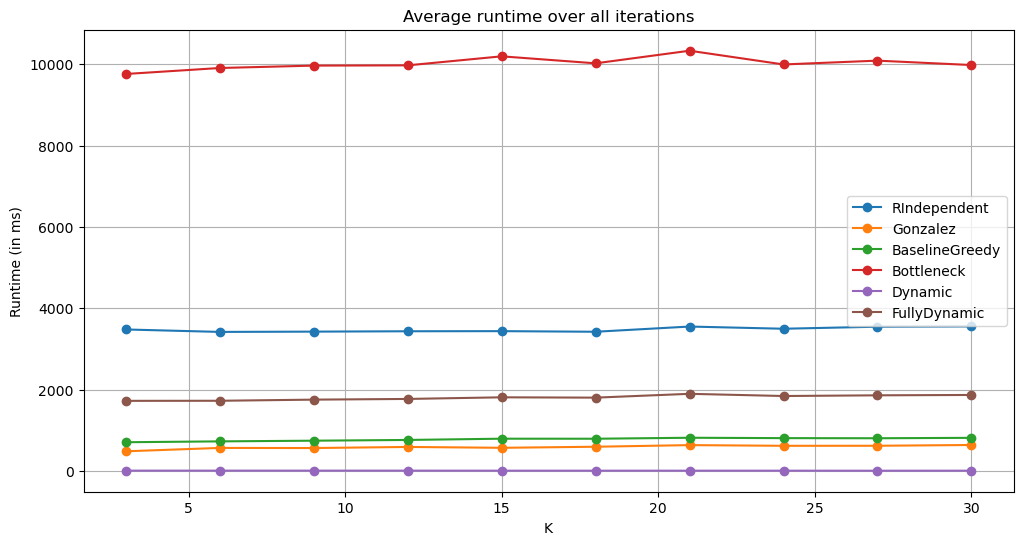

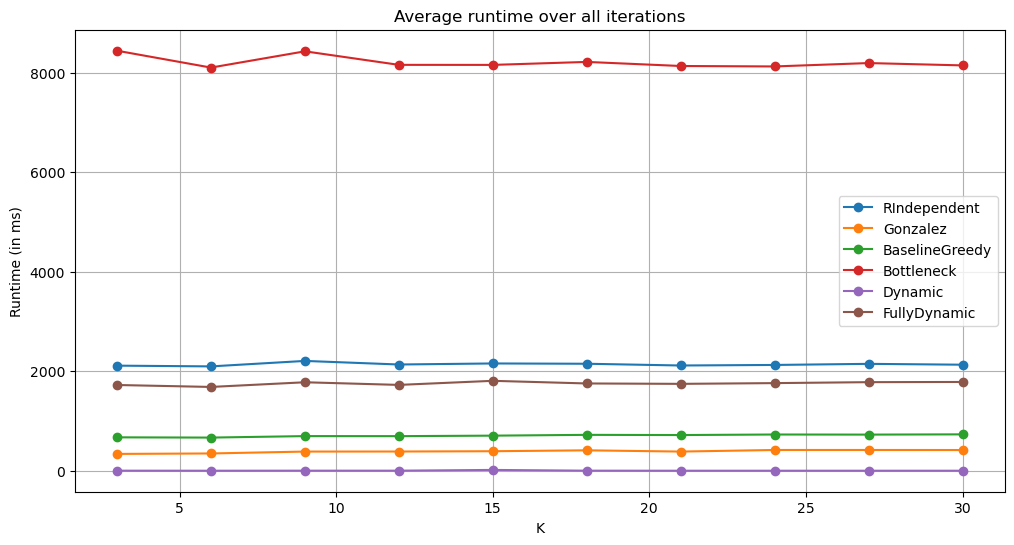

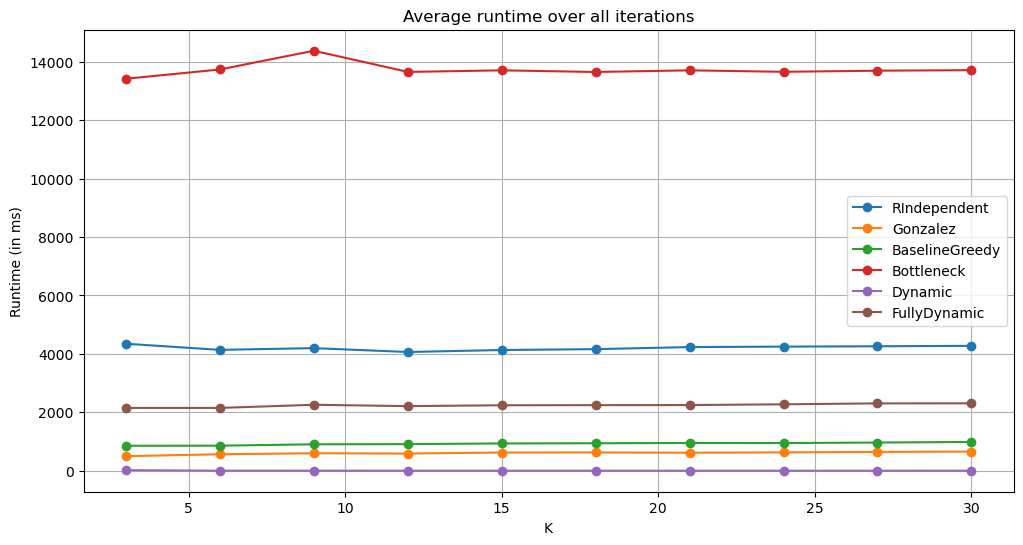

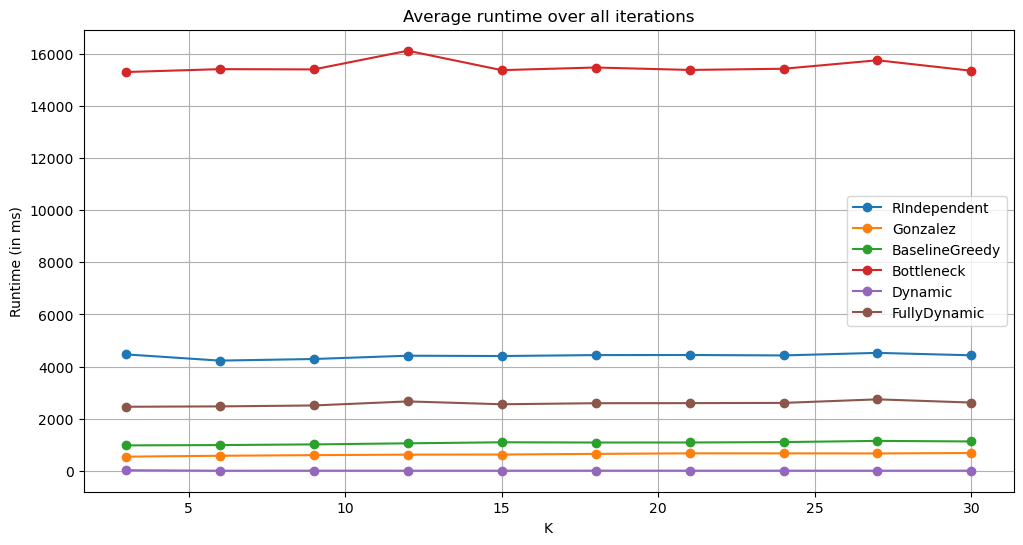

In [64]:
files = os.listdir('results/short/DecrementalKcenter')
files = [f for f in files if 'ant-colony' in f and 'Runtime' in f]

for file in files:
    df = pd.read_csv('results/short/DecrementalKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Runtime (in ms)')
    plt.title('Average runtime over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Incremental K center

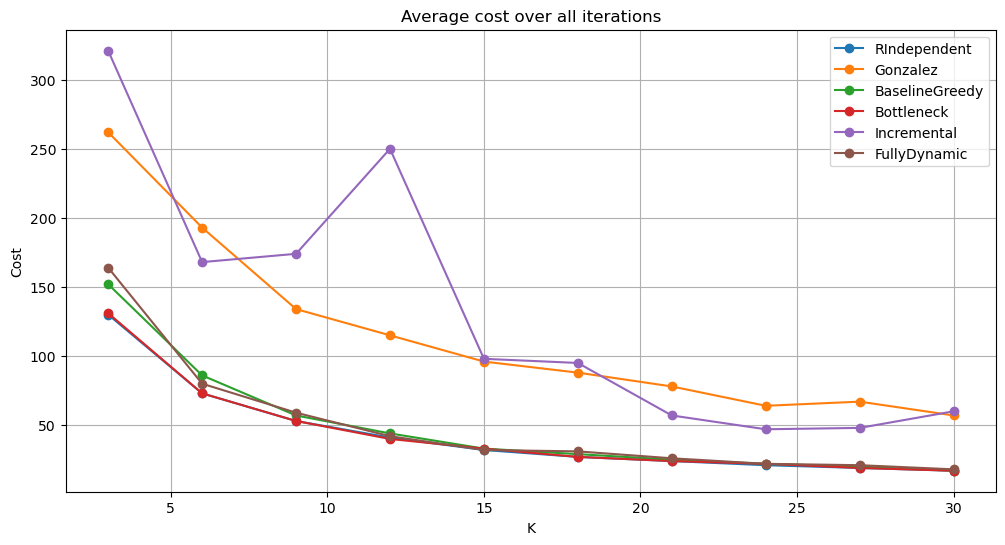

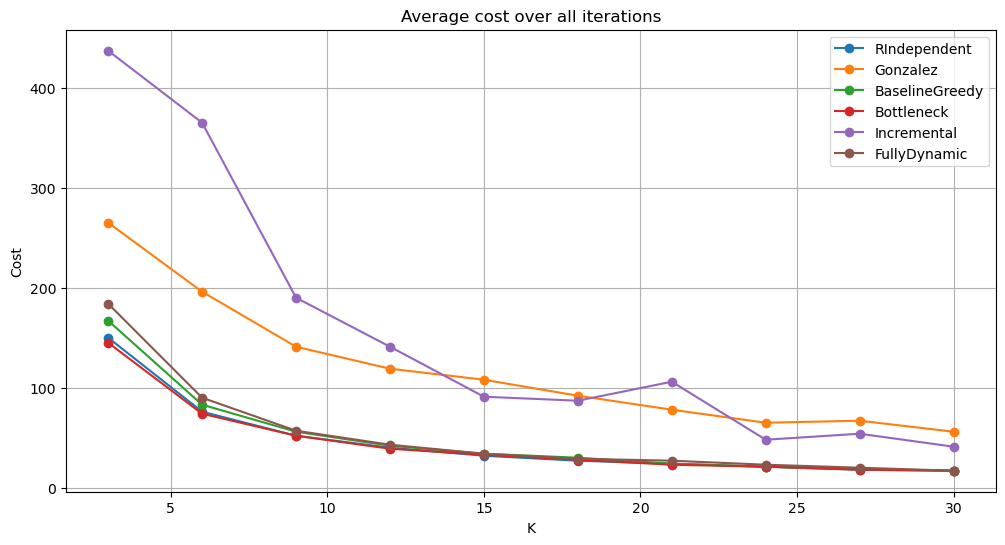

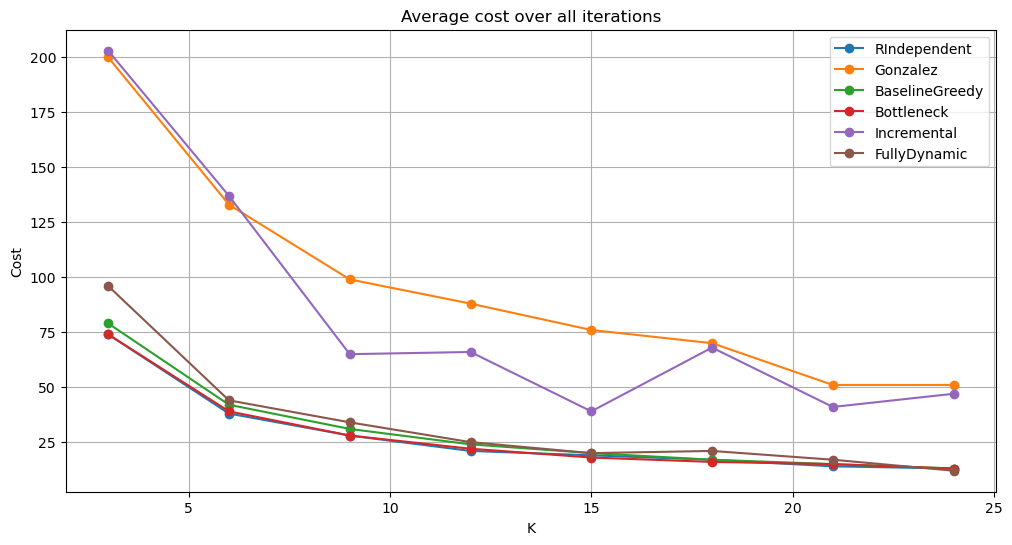

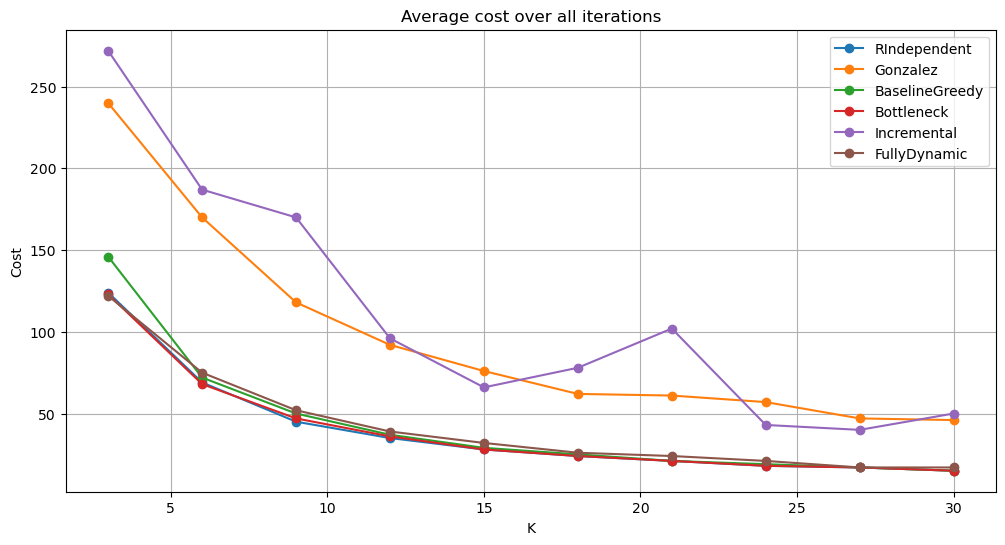

In [67]:
files = os.listdir('results/short/IncrementalKcenter')
files = [f for f in files if 'ant-colony' in f and 'Cost' in f]

for file in files:
    df = pd.read_csv('results/short/IncrementalKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.title('Average cost over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

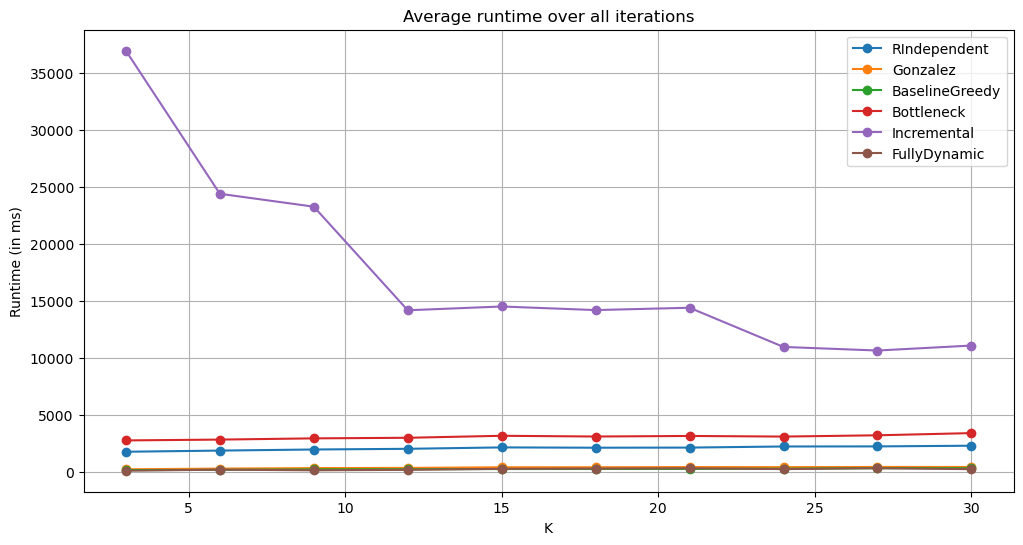

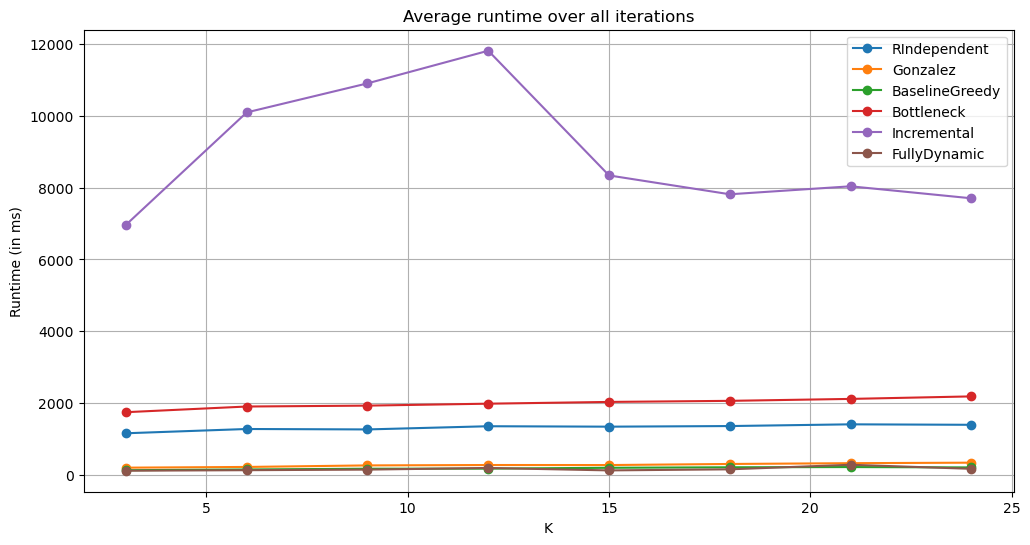

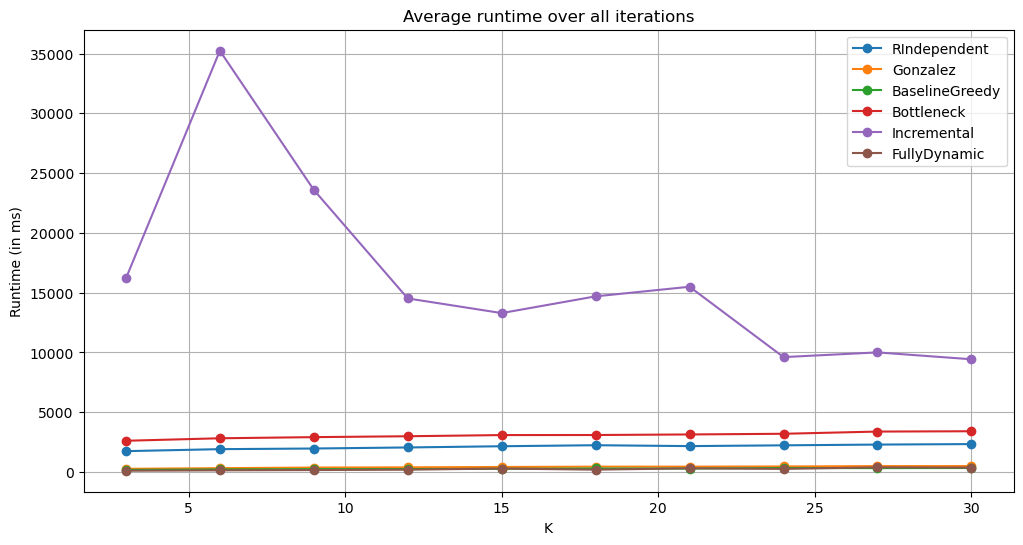

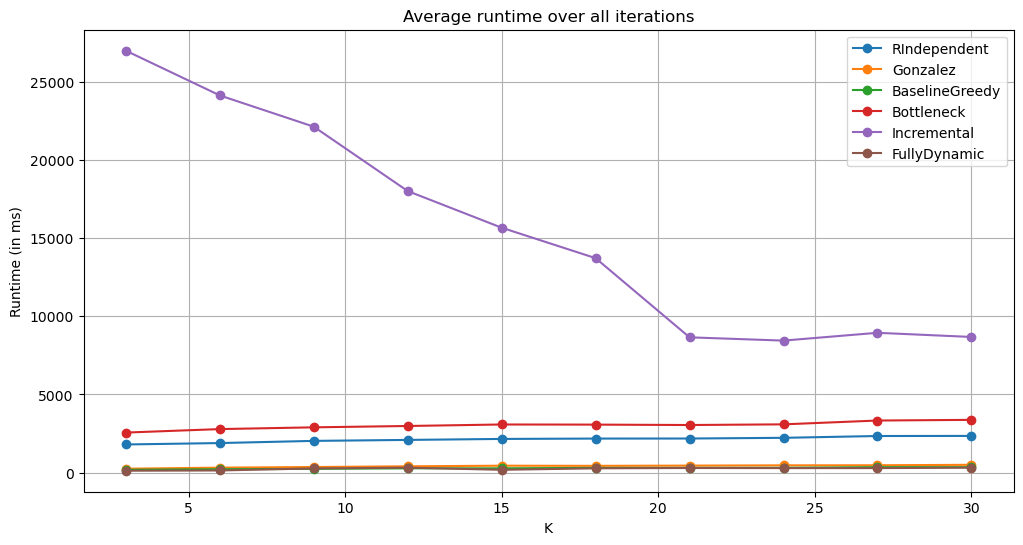

In [68]:
files = os.listdir('results/short/IncrementalKcenter')
files = [f for f in files if 'ant-colony' in f and 'Runtime' in f]

for file in files:
    df = pd.read_csv('results/short/IncrementalKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Runtime (in ms)')
    plt.title('Average runtime over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Fully dynamic K center

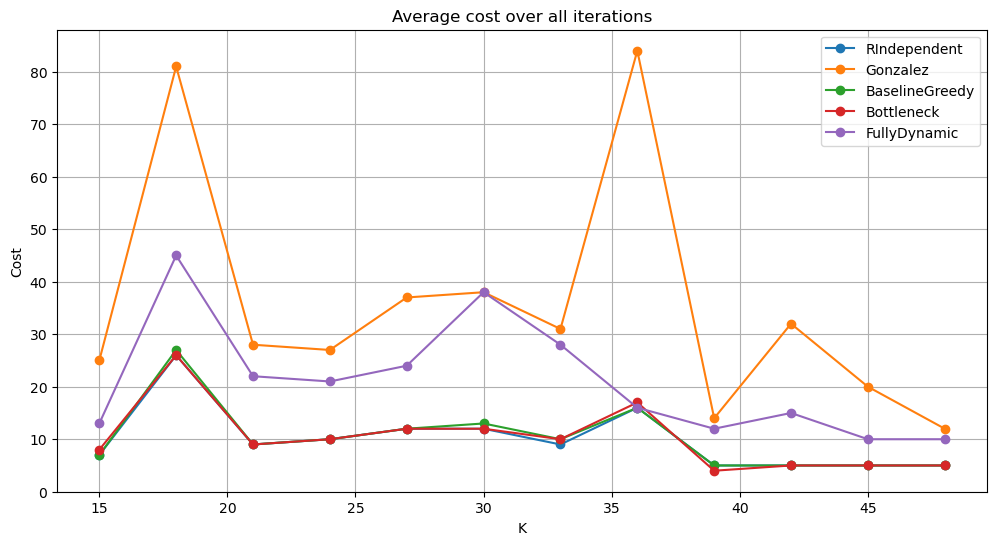

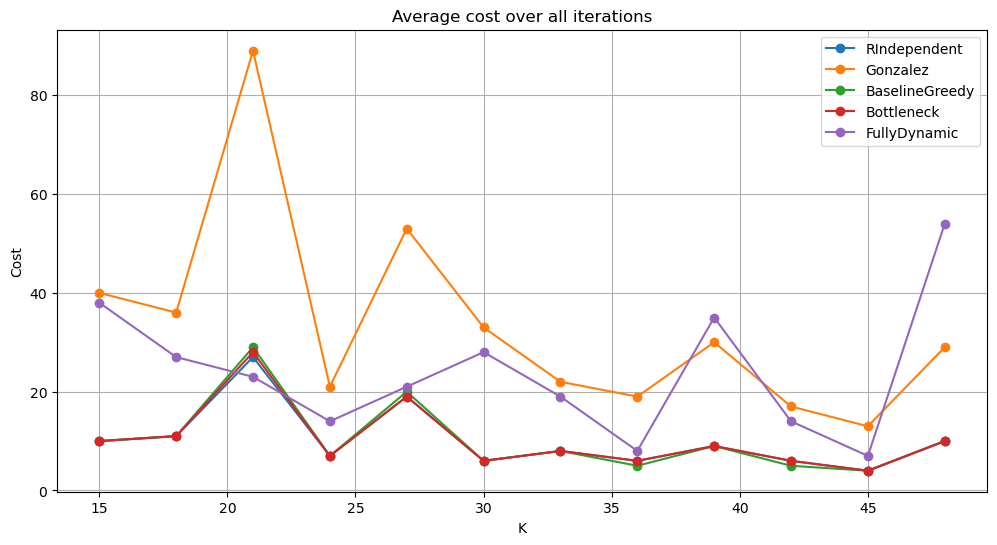

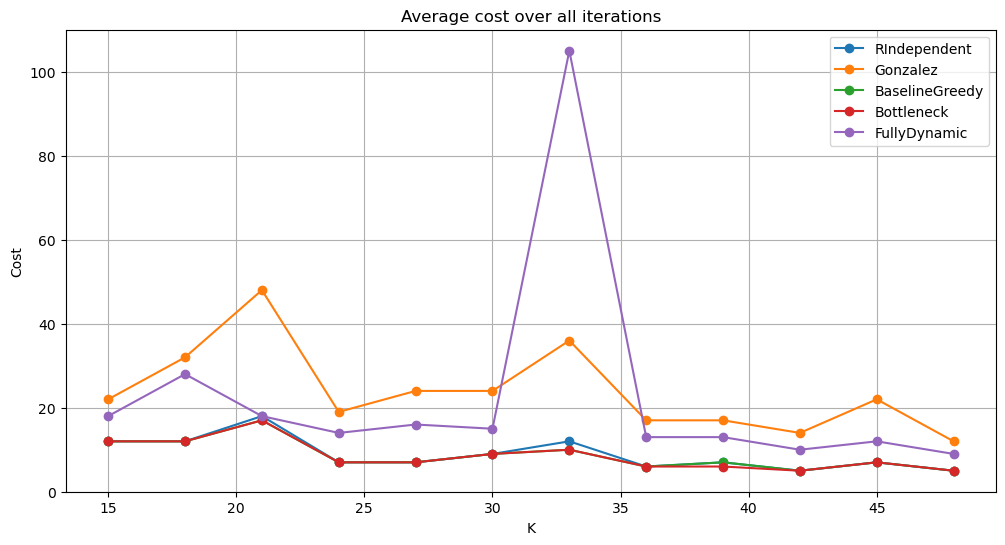

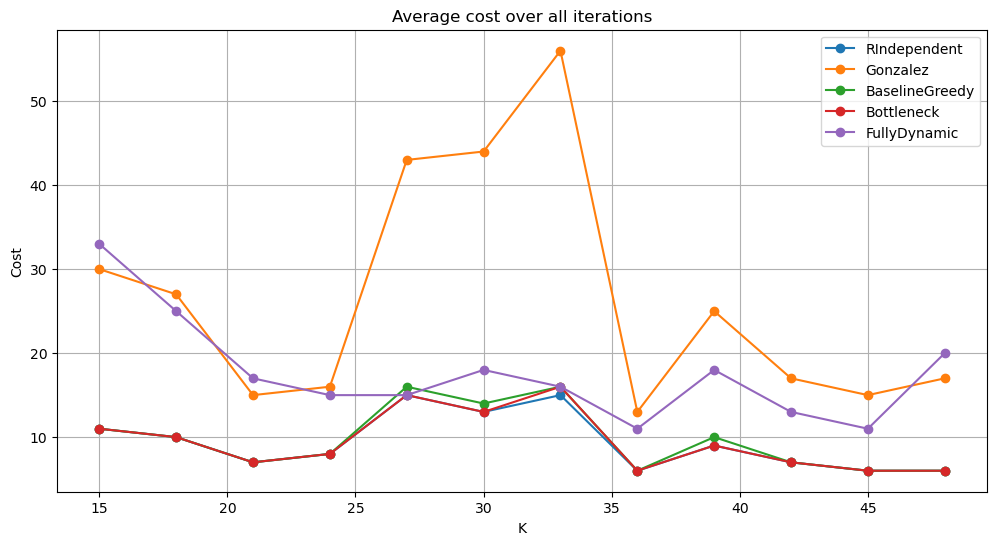

In [65]:
files = os.listdir('results/short/FullKcenter')
files = [f for f in files if 'ant-colony' in f and 'Cost' in f]

for file in files:
    df = pd.read_csv('results/short/FullKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.title('Average cost over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

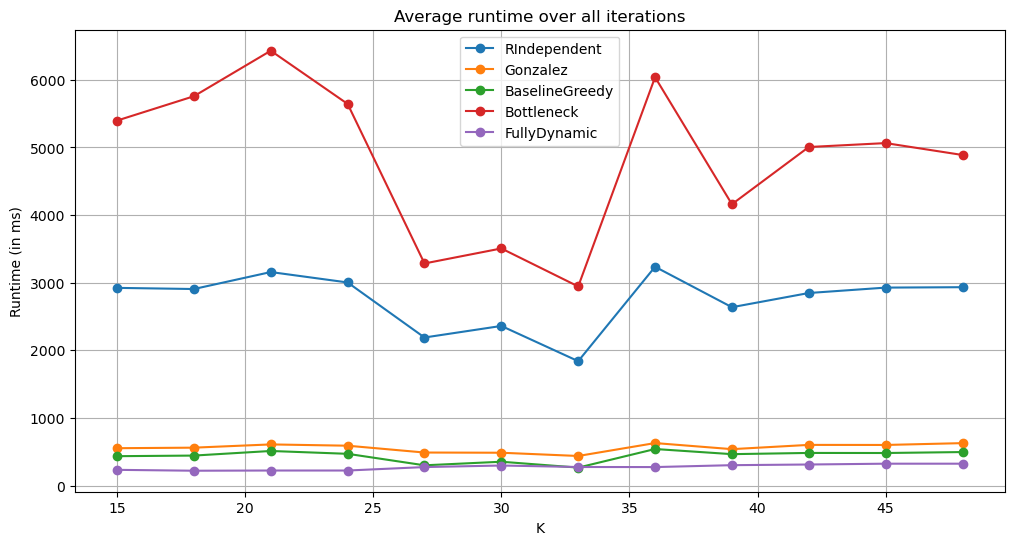

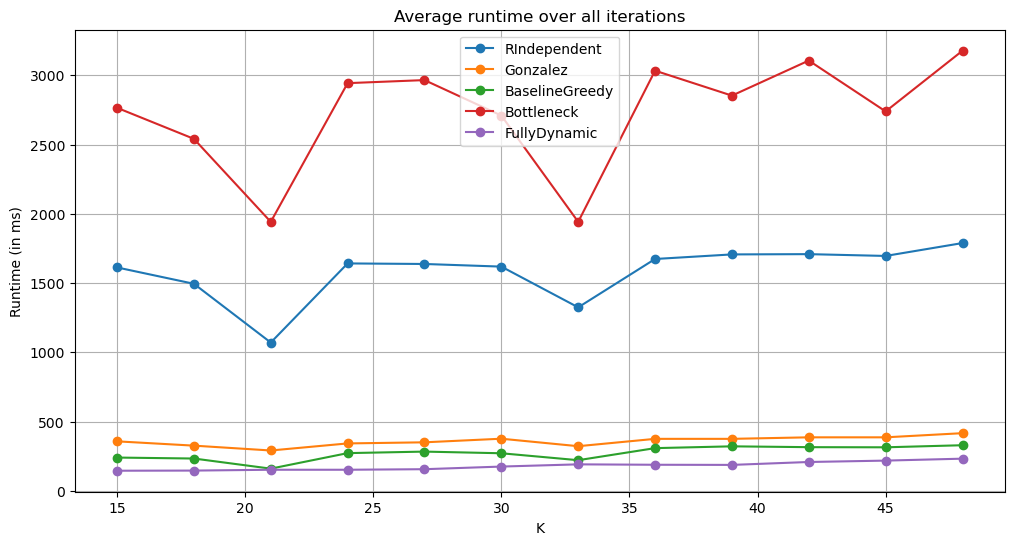

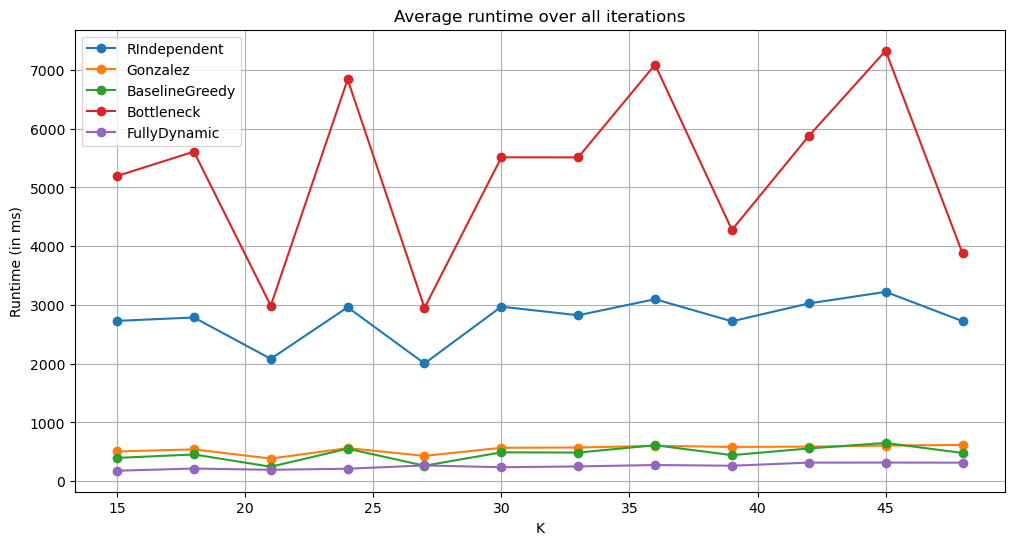

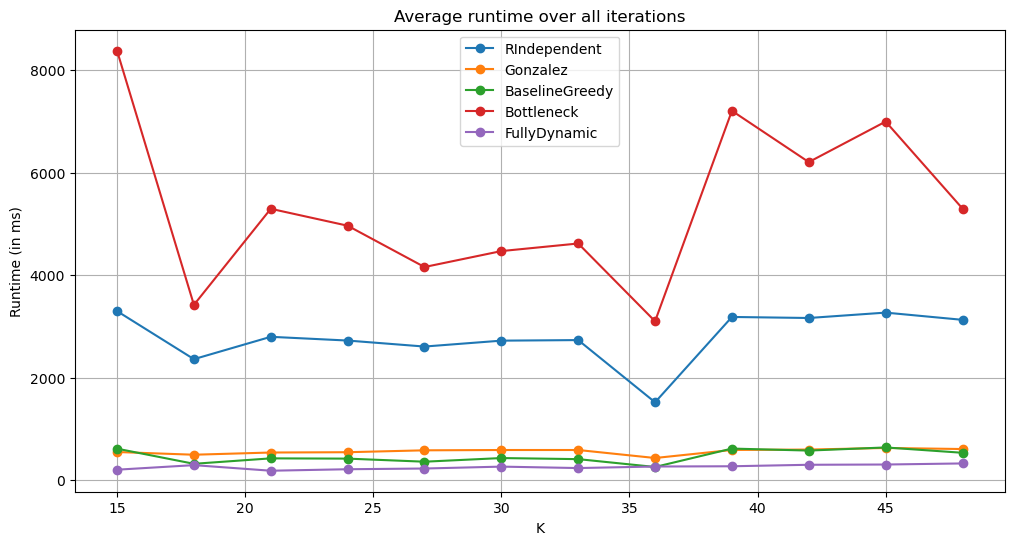

In [66]:
files = os.listdir('results/short/FullKcenter')
files = [f for f in files if 'ant-colony' in f and 'Runtime' in f]

for file in files:
    df = pd.read_csv('results/short/FullKcenter/'+file, sep = ' ')
    plt.figure(figsize=(12, 6))


    for column in df.columns[1:]:
        plt.plot(df['k'], df[column], marker='o', label=column)

    plt.xlabel('K')
    plt.ylabel('Runtime (in ms)')
    plt.title('Average runtime over all iterations')
    plt.legend()
    plt.grid(True)
    plt.show()